# New_Discover_2_Before_COVID

In [6]:
## Reference: https://huggingface.co/dslim/bert-base-NER

In [1]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

### Model description
bert-base-NER is a fine-tuned BERT model that is ready to use for Named Entity Recognition and achieves state-of-the-art performance for the NER task. It has been trained to recognize four types of entities: location (LOC), organizations (ORG), person (PER) and Miscellaneous (MISC).

Specifically, this model is a bert-base-cased model that was fine-tuned on the English version of the standard CoNLL-2003 Named Entity Recognition dataset.

In [2]:
tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")

Downloading:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/829 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/413M [00:00<?, ?B/s]

In [3]:
nlp = pipeline("ner", model=model, tokenizer=tokenizer)
example = "My name is Wolfgang and I live in Berlin"

In [4]:
ner_results = nlp(example)
print(ner_results)

[{'entity': 'B-PER', 'score': 0.99901396, 'index': 4, 'word': 'Wolfgang', 'start': 11, 'end': 19}, {'entity': 'B-LOC', 'score': 0.999645, 'index': 9, 'word': 'Berlin', 'start': 34, 'end': 40}]


### Limitations and bias
This model is limited by its training dataset of entity-annotated news articles from a specific span of time. This may not generalize well for all use cases in different domains. Furthermore, the model occassionally tags subword tokens as entities and post-processing of results may be necessary to handle those cases.

### Training data
This model was fine-tuned on English version of the standard CoNLL-2003 Named Entity Recognition dataset.

The training dataset distinguishes between the beginning and continuation of an entity so that if there are back-to-back entities of the same type, the model can output where the second entity begins. As in the dataset, each token will be classified as one of the following classes:

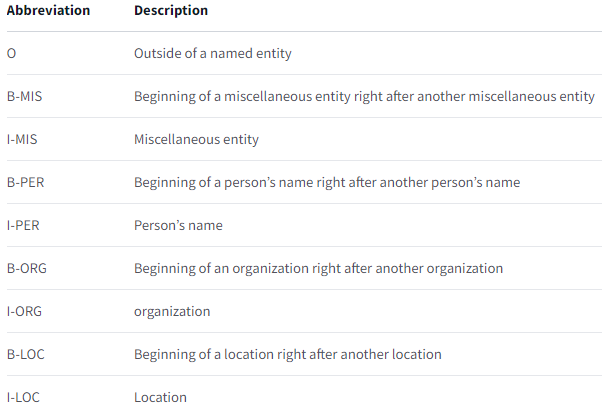

CoNLL-2003 English Dataset Statistics
This dataset was derived from the Reuters corpus which consists of Reuters news stories. You can read more about how this dataset was created in the CoNLL-2003 paper.

### With Original Reddit Data

In [21]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

In [5]:
import pandas as pd
data = pd.read_csv("Clean_Data_Before_Covid.csv")
data.head()

id                                              final
0  ffbxc48  alternative economic model needed native ameri...
1  ffc5i6h  splutters tea dude owns duchy cornwall sure he...
2  ff8z7yf  garbage half necessarily correct spell hair co...
3  ff8znss  hello thank comment dedicated learn strive eco...
4  ff8i5we  sounds great wood wooden buildings look nice d...

In [7]:
data.shape

(31790, 2)

In [9]:
sample1000=data.iloc[0:1000]

In [10]:
sample1000.head()

id                                              final
0  ffbxc48  alternative economic model needed native ameri...
1  ffc5i6h  splutters tea dude owns duchy cornwall sure he...
2  ff8z7yf  garbage half necessarily correct spell hair co...
3  ff8znss  hello thank comment dedicated learn strive eco...
4  ff8i5we  sounds great wood wooden buildings look nice d...

In [17]:
sample1000=sample1000.dropna()

In [18]:
batch_sentences = sample1000["final"].tolist()

In [19]:
batch_sentences

['alternative economic model needed native americans aboriginal australians indigenous peoples provide models thousands years work west colonized lands silenced erased ways living need new model listen voices princes ancestors conquered killed capitalism indigenous thought',
 'splutters tea dude owns duchy cornwall sure hes somewhat environmentally friendly hes personally benefitted hugely business usual',
 'garbage half necessarily correct spell hair correctly included petroleum wtf quit exploiting real issues push shitty blog',
 'hello thank comment dedicated learn strive ecofriendly lifestyle far perfect thought people interested learn way sorry feel unhappy misspelled word hair correct love learn blog week old best hoping better day',
 'sounds great wood wooden buildings look nice definitely increased fire risk hopefully good sprinkler system mitigate article point fire resistance clt wood experiments laminate damaged allow wood combust article uses example lighting match log showi

In [22]:
encoded_inputs = tokenizer(batch_sentences, truncation=True)

In [23]:
print(encoded_inputs)

{'input_ids': [[101, 4174, 2670, 2235, 1834, 2900, 1821, 26237, 5443, 170, 12207, 24874, 7050, 12686, 16468, 15647, 1116, 6854, 7983, 2194, 3584, 4674, 1201, 1250, 1745, 1884, 4934, 2200, 4508, 3747, 1181, 27248, 3242, 1690, 1444, 1207, 2235, 5113, 6000, 18043, 11005, 11578, 1841, 20582, 6854, 1354, 102], [101, 188, 1643, 25937, 5759, 5679, 17869, 8300, 3840, 8992, 11184, 9456, 1612, 1119, 1116, 4742, 4801, 1193, 4931, 1119, 1116, 7572, 5257, 1906, 3321, 1193, 1671, 4400, 102], [101, 14946, 1544, 9073, 5663, 5814, 1716, 11214, 1529, 17697, 192, 1204, 2087, 8204, 19685, 1158, 1842, 2492, 4684, 4170, 2340, 10679, 102], [101, 19082, 6243, 7368, 3256, 3858, 188, 19091, 2707, 174, 2528, 23630, 1193, 9897, 1677, 3264, 1354, 1234, 3888, 3858, 1236, 2959, 1631, 13143, 5529, 24015, 1937, 1716, 5663, 1567, 3858, 10679, 1989, 1385, 1436, 4717, 1618, 1285, 102], [101, 3807, 1632, 3591, 4122, 2275, 1440, 3505, 5397, 2569, 1783, 3187, 16121, 1363, 188, 1643, 4854, 12767, 1197, 1449, 26410, 25342, 33

In [30]:
type(encoded_inputs)

transformers.tokenization_utils_base.BatchEncoding

In [34]:
new = pd.DataFrame.from_dict(encoded_inputs)

In [35]:
new.head()

0
0       input_ids
1  token_type_ids
2  attention_mask

In [24]:
data_items = encoded_inputs.items()

In [25]:
data_list = list(data_items)

In [40]:
data_list

[('input_ids',
  [[101,
    4174,
    2670,
    2235,
    1834,
    2900,
    1821,
    26237,
    5443,
    170,
    12207,
    24874,
    7050,
    12686,
    16468,
    15647,
    1116,
    6854,
    7983,
    2194,
    3584,
    4674,
    1201,
    1250,
    1745,
    1884,
    4934,
    2200,
    4508,
    3747,
    1181,
    27248,
    3242,
    1690,
    1444,
    1207,
    2235,
    5113,
    6000,
    18043,
    11005,
    11578,
    1841,
    20582,
    6854,
    1354,
    102],
   [101,
    188,
    1643,
    25937,
    5759,
    5679,
    17869,
    8300,
    3840,
    8992,
    11184,
    9456,
    1612,
    1119,
    1116,
    4742,
    4801,
    1193,
    4931,
    1119,
    1116,
    7572,
    5257,
    1906,
    3321,
    1193,
    1671,
    4400,
    102],
   [101,
    14946,
    1544,
    9073,
    5663,
    5814,
    1716,
    11214,
    1529,
    17697,
    192,
    1204,
    2087,
    8204,
    19685,
    1158,
    1842,
    2492,
    4684,
    4170,
    2340,
   

In [26]:
df = pd.DataFrame(data_list)

In [36]:
df.head()

0                                                  1
0       input_ids  [[101, 4174, 2670, 2235, 1834, 2900, 1821, 262...
1  token_type_ids  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
2  attention_mask  [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...

In [16]:
batch_sentences = [
    "But what about second breakfast?",
    "Don't think he knows about second breakfast, Pip.",
    "What about elevensies?",
]
encoded_inputs = tokenizer(batch_sentences)


{'input_ids': [[101, 1252, 1184, 1164, 1248, 6462, 136, 102], [101, 1790, 112, 189, 1341, 1119, 3520, 1164, 1248, 6462, 117, 21902, 1643, 119, 102], [101, 1327, 1164, 5450, 23434, 136, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1]]}


In [39]:
data = {'name': [['nick', 'david'], ['joe', 'ross']],
        'age': [['5', '10'],[ '7', '6']]} 
new = pd.DataFrame.from_dict(data)
  
new

name      age
0  [nick, david]  [5, 10]
1    [joe, ross]   [7, 6]

In [10]:
!pip install tensorflow==2.6.0 –ignore-installed

ERROR: Invalid requirement: '–ignore-installed'


In [11]:
from keras.preprocessing.sequence import pad_sequences

In [2]:
import transformers

print(transformers.__version__)

4.12.5


In [5]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))


There are 1 GPU(s) available.
We will use the GPU: NVIDIA GeForce RTX 3060 Laptop GPU


C:\Users\Naim Cavin\anaconda3\lib\site-packages\torch\cuda\__init__.py:143: UserWarning: 
NVIDIA GeForce RTX 3060 Laptop GPU with CUDA capability sm_86 is not compatible with the current PyTorch installation.
The current PyTorch install supports CUDA capabilities sm_37 sm_50 sm_60 sm_61 sm_70 sm_75 compute_37.
If you want to use the NVIDIA GeForce RTX 3060 Laptop GPU GPU with PyTorch, please check the instructions at https://pytorch.org/get-started/locally/

  warnings.warn(incompatible_device_warn.format(device_name, capability, " ".join(arch_list), device_name))


In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [14]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))

In [15]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: NVIDIA GeForce RTX 3060 Laptop GPU


In [16]:
import transformers

In [18]:
import csv

tsv_file = open("in_domain_train.tsv")
read_tsv = csv.reader(tsv_file, delimiter="\t")

In [22]:
df = pd.read_csv("in_domain_train.tsv",  delimiter='\t', header=None, names=['sentence_source', 'label', 'label_notes', 'sentence'])

In [23]:
df

sentence_source  label label_notes  \
0               gj04      1         NaN   
1               gj04      1         NaN   
2               gj04      1         NaN   
3               gj04      1         NaN   
4               gj04      1         NaN   
...              ...    ...         ...   
8546            ad03      0           *   
8547            ad03      0           *   
8548            ad03      1         NaN   
8549            ad03      1         NaN   
8550            ad03      1         NaN   

                                               sentence  
0     Our friends won't buy this analysis, let alone...  
1     One more pseudo generalization and I'm giving up.  
2      One more pseudo generalization or I'm giving up.  
3        The more we study verbs, the crazier they get.  
4             Day by day the facts are getting murkier.  
...                                                 ...  
8546                   Poseidon appears to own a dragon  
8547                     Digitize is my happiest memory  
8548                     It is easy to slay the Gorgon.  
8549       I had the strangest feeling that I knew you.  
8550                What all did you get for Christmas?  

[8551 rows x 4 columns]

In [24]:
df.loc[df.label == 0].sample(5)[['sentence', 'label']]

sentence  label
63                      This building is than that one.      0
302   Which folks up at corporate headquarters do yo...      0
7893                                  Myself shaved me.      0
7510  John hurt John with John's umbrella when John ...      0
4680      The hot sun was played under by the children.      0

In [25]:
# Get the lists of sentences and their labels.
sentences = df.sentence.values
labels = df.label.values

## Tokenization & Input Formatting
In this section, we'll transform our dataset into the format that BERT can be trained on.v

### BERT Tokenizer
To feed our text to BERT, it must be split into tokens, and then these tokens must be mapped to their index in the tokenizer vocabulary.

The tokenization must be performed by the tokenizer included with BERT--the below cell will download this for us. We'll be using the "uncased" version here.

In [26]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [27]:
 sentences[0]

"Our friends won't buy this analysis, let alone the next one we propose."

In [28]:
# Print the original sentence.
print(' Original: ', sentences[0])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(sentences[0]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))

 Original:  Our friends won't buy this analysis, let alone the next one we propose.
Tokenized:  ['our', 'friends', 'won', "'", 't', 'buy', 'this', 'analysis', ',', 'let', 'alone', 'the', 'next', 'one', 'we', 'propose', '.']
Token IDs:  [2256, 2814, 2180, 1005, 1056, 4965, 2023, 4106, 1010, 2292, 2894, 1996, 2279, 2028, 2057, 16599, 1012]


### Required Formatting
The above code left out a few required formatting steps that we'll look at here.

Side Note: The input format to BERT seems "over-specified" to me... We are required to give it a number of pieces of information which seem redundant, or like they could easily be inferred from the data without us explicity providing it. But it is what it is, and I suspect it will make more sense once I have a deeper understanding of the BERT internals.

We are required to:

Add special tokens to the start and end of each sentence. Pad & truncate all sentences to a single constant length. Explicitly differentiate real tokens from padding tokens with the "attention mask". Special Tokens [SEP]

At the end of every sentence, we need to append the special [SEP] token.

This token is an artifact of two-sentence tasks, where BERT is given two separate sentences and asked to determine something (e.g., can the answer to the question in sentence A be found in sentence B?).

I am not certain yet why the token is still required when we have only single-sentence input, but it is!

[CLS]

For classification tasks, we must prepend the special [CLS] token to the beginning of every sentence.

This token has special significance. BERT consists of 12 Transformer layers. Each transformer takes in a list of token embeddings, and produces the same number of embeddings on the output (but with the feature values changed, of course!).

### Illustration of CLS token purpose
On the output of the final (12th) transformer, only the first embedding (corresponding to the [CLS] token) is used by the classifier.

"The first token of every sequence is always a special classification token ([CLS]). The final hidden state corresponding to this token is used as the aggregate sequence representation for classification tasks." (from the BERT paper)

I'm not sure why the authors took this strategy instead of some kind of pooling of all the final vectors, but I'm sure that if pooling were better they would have gone that route.

Also, because BERT is trained to only use this [CLS] token for classification, we know that the model has been motivated to encode everything it needs for the classification step into that single 768-value embedding vector.

### Sentence Length & Attention Mask
The sentences in our dataset obviously have varying lengths, so how does BERT handle this?

BERT has two constraints:

All sentences must be padded or truncated to a single, fixed length. The maximum sentence length is 512 tokens. Padding is done with a special [PAD] token, which is at index 0 in the BERT vocabulary. The below illustration demonstrates padding out to a "MAX_LEN" of 8 tokens.

The "Attention Mask" is simply an array of 1s and 0s indicating which tokens are padding and which aren't (seems kind of redundant, doesn't it?! Again, I don't currently know why).

I've experimented with running this notebook with two different values of MAX_LEN, and it impacted both the training speed and the test set accuracy.

With a Tesla K80 and:

MAX_LEN = 128 --> Training epochs take ~5:28 each, score is 0.535 MAX_LEN = 64 --> Training epochs take ~2:57 each, score is 0.566 These results suggest to me that the padding tokens aren't simply skipped over--that they are in fact fed through the model and incorporated in the results (thereby impacting both model speed and accuracy). I'll have to dig into the architecture more to understand this.

### Sentences to IDs
The tokenizer.encode function combines multiple steps for us:

- Split the sentence into tokens.
- Add the special [CLS] and [SEP] tokens.
- Map the tokens to their IDs.

Oddly, this function can perform truncating for us, but doesn't handle padding.

In [29]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []

# For every sentence...
for sent in sentences:
    # `encode` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    encoded_sent = tokenizer.encode(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'

                        # This function also supports truncation and conversion
                        # to pytorch tensors, but we need to do padding, so we
                        # can't use these features :( .
                        #max_length = 128,          # Truncate all sentences.
                        #return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.
    input_ids.append(encoded_sent)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Original:  Our friends won't buy this analysis, let alone the next one we propose.
Token IDs: [101, 2256, 2814, 2180, 1005, 1056, 4965, 2023, 4106, 1010, 2292, 2894, 1996, 2279, 2028, 2057, 16599, 1012, 102]


### Padding and Truncating
Pad and truncate our sequences so that they all have the same length, MAX_LEN.

First, what's the maximum sentence length in our dataset?

In [30]:
print('Max sentence length: ', max([len(sen) for sen in input_ids]))

Max sentence length:  47


In [31]:
# We'll borrow the `pad_sequences` utility function to do this.
from keras.preprocessing.sequence import pad_sequences

# Set the maximum sequence length.
# I've chosen 64 somewhat arbitrarily. It's slightly larger than the
# maximum training sentence length of 47...
MAX_LEN = 64

print('\nPadding/truncating all sentences to %d values...' % MAX_LEN)

print('\nPadding token: "{:}", ID: {:}'.format(tokenizer.pad_token, tokenizer.pad_token_id))

# Pad our input tokens with value 0.
# "post" indicates that we want to pad and truncate at the end of the sequence,
# as opposed to the beginning.
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", 
                          value=0, truncating="post", padding="post")

print('\nDone.')


Padding/truncating all sentences to 64 values...

Padding token: "[PAD]", ID: 0

Done.


### Attention Masks
The attention mask simply makes it explicit which tokens are actual words versus which are padding.

The BERT vocabulary does not use the ID 0, so if a token ID is 0, then it's padding, and otherwise it's a real token.

In [32]:
# Create attention masks
attention_masks = []

# For each sentence...
for sent in input_ids:
    
    # Create the attention mask.
    #   - If a token ID is 0, then it's padding, set the mask to 0.
    #   - If a token ID is > 0, then it's a real token, set the mask to 1.
    att_mask = [int(token_id > 0) for token_id in sent]
    
    # Store the attention mask for this sentence.
    attention_masks.append(att_mask)

### Training & Validation Split

In [34]:
# Use train_test_split to split our data into train and validation sets for
# training

from sklearn.model_selection import train_test_split

# Use 90% for training and 10% for validation.
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels, 
                                                            random_state=2018, test_size=0.1)
# Do the same for the masks.
train_masks, validation_masks, _, _ = train_test_split(attention_masks, labels,
                                             random_state=2018, test_size=0.1)

### Converting to PyTorch Data Types
Our model expects PyTorch tensors rather than numpy.ndarrays, so convert all of our dataset variables.

In [35]:
# Convert all inputs and labels into torch tensors, the required datatype 
# for our model.
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)

train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)

train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

In [36]:
train_inputs 

tensor([[  101,  2002,  2939,  ...,     0,     0,     0],
        [  101,  1998,  2009,  ...,     0,     0,     0],
        [  101, 15609,  2038,  ...,     0,     0,     0],
        ...,
        [  101,  2048,  3719,  ...,     0,     0,     0],
        [  101,  2348, 23848,  ...,     0,     0,     0],
        [  101, 13723,  8487,  ...,     0,     0,     0]], dtype=torch.int32)

In [37]:
train_labels

tensor([1, 1, 1,  ..., 1, 0, 1])

In [38]:
train_masks

tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])

We'll also create an iterator for our dataset using the torch DataLoader class. This helps save on memory during training because, unlike a for loop, with an iterator the entire dataset does not need to be loaded into memory.

In [39]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here.
# For fine-tuning BERT on a specific task, the authors recommend a batch size of
# 16 or 32.

batch_size = 32

# Create the DataLoader for our training set.
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set.
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

### Train Our Classification Model
#### BertForSequenceClassification

For this task, we first want to modify the pre-trained BERT model to give outputs for classification, and then we want to continue training the model on our dataset until that the entire model, end-to-end, is well-suited for our task.

Thankfully, the huggingface pytorch implementation includes a set of interfaces designed for a variety of NLP tasks. Though these interfaces are all built on top of a trained BERT model, each has different top layers and output types designed to accomodate their specific NLP task.

Here is the current list of classes provided for fine-tuning:

BertModel
BertForPreTraining
BertForMaskedLM
BertForNextSentencePrediction
BertForSequenceClassification - The one we'll use.
BertForTokenClassification
BertForQuestionAnswering

We'll be using BertForSequenceClassification. This is the normal BERT model with an added single linear layer on top for classification that we will use as a sentence classifier. As we feed input data, the entire pre-trained BERT model and the additional untrained classification layer is trained on our specific task.

OK, let's load BERT! There are a few different pre-trained BERT models available. "bert-base-uncased" means the version that has only lowercase letters ("uncased") and is the smaller version of the two ("base" vs "large").

In [40]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 2, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [41]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (30522, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (

### Optimizer and Learning Rate Scheduler
Now that we have our model loaded we need to grab the training hyperparameters from within the stored model.

For the purposes of fine-tuning, the authors recommend choosing from the following values:

- Batch size: 16, 32 (We chose 32 when creating our DataLoaders).
- Learning rate (Adam): 5e-5, 3e-5, 2e-5 (We'll use 2e-5).
- Number of epochs: 2, 3, 4 (We'll use 4).
- The epsilon parameter eps = 1e-8 is "a very small number to prevent any division by zero in the implementation" (from here).

In [42]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

In [43]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs (authors recommend between 2 and 4)
epochs = 4

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)
scheduler

### Training Loop
Below is our training loop. There's a lot going on, but fundamentally for each pass in our loop we have a trianing phase and a validation phase. At each pass we need to:

#### Training loop:
- Unpack our data inputs and labels
- Load data onto the GPU for acceleration
- Clear out the gradients calculated in the previous pass.
- In pytorch the gradients accumulate by default (useful for things like RNNs) unless you explicitly clear them out.
- Forward pass (feed input data through the network)
- Backward pass (backpropagation)
- Tell the network to update parameters with optimizer.step()
- Track variables for monitoring progress

#### Evalution loop:
- Unpack our data inputs and labels
- Load data onto the GPU for acceleration
- Forward pass (feed input data through the network)
- Compute loss on our validation data and track variables for monitoring progress

In [44]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [45]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [46]:
import random

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128


# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Store the average loss after each epoch so we can plot them.
loss_values = []

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # This will return the loss (rather than the model output) because we
        # have provided the `labels`.
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        outputs = model(b_input_ids, 
                    token_type_ids=None, 
                    attention_mask=b_input_mask, 
                    labels=b_labels)
        
        # The call to `model` always returns a tuple, so we need to pull the 
        # loss value out of the tuple.
        loss = outputs[0]

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)            
    
    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        
        # Telling the model not to compute or store gradients, saving memory and
        # speeding up validation
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # This will return the logits rather than the loss because we have
            # not provided labels.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            outputs = model(b_input_ids, 
                            token_type_ids=None, 
                            attention_mask=b_input_mask)
        
        # Get the "logits" output by the model. The "logits" are the output
        # values prior to applying an activation function like the softmax.
        logits = outputs[0]

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        # Calculate the accuracy for this batch of test sentences.
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        
        # Accumulate the total accuracy.
        eval_accuracy += tmp_eval_accuracy

        # Track the number of batches
        nb_eval_steps += 1

    # Report the final accuracy for this validation run.
    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))

print("")
print("Training complete!")


======== Epoch 1 / 4 ========
Training...
  Batch    40  of    241.    Elapsed: 0:38:22.
  Batch    80  of    241.    Elapsed: 0:39:35.
  Batch   120  of    241.    Elapsed: 0:40:48.
  Batch   160  of    241.    Elapsed: 0:42:00.
  Batch   200  of    241.    Elapsed: 0:43:12.
  Batch   240  of    241.    Elapsed: 0:44:24.

  Average training loss: 0.49
  Training epcoh took: 0:44:24

Running Validation...
  Accuracy: 0.78
  Validation took: 0:00:16

======== Epoch 2 / 4 ========
Training...
  Batch    40  of    241.    Elapsed: 0:01:12.
  Batch    80  of    241.    Elapsed: 0:02:23.
  Batch   120  of    241.    Elapsed: 0:03:35.
  Batch   160  of    241.    Elapsed: 0:04:47.
  Batch   200  of    241.    Elapsed: 0:05:58.
  Batch   240  of    241.    Elapsed: 0:07:10.

  Average training loss: 0.31
  Training epcoh took: 0:07:11

Running Validation...
  Accuracy: 0.81
  Validation took: 0:00:16

======== Epoch 3 / 4 ========
Training...
  Batch    40  of    241.    Elapsed: 0:01:12.
  

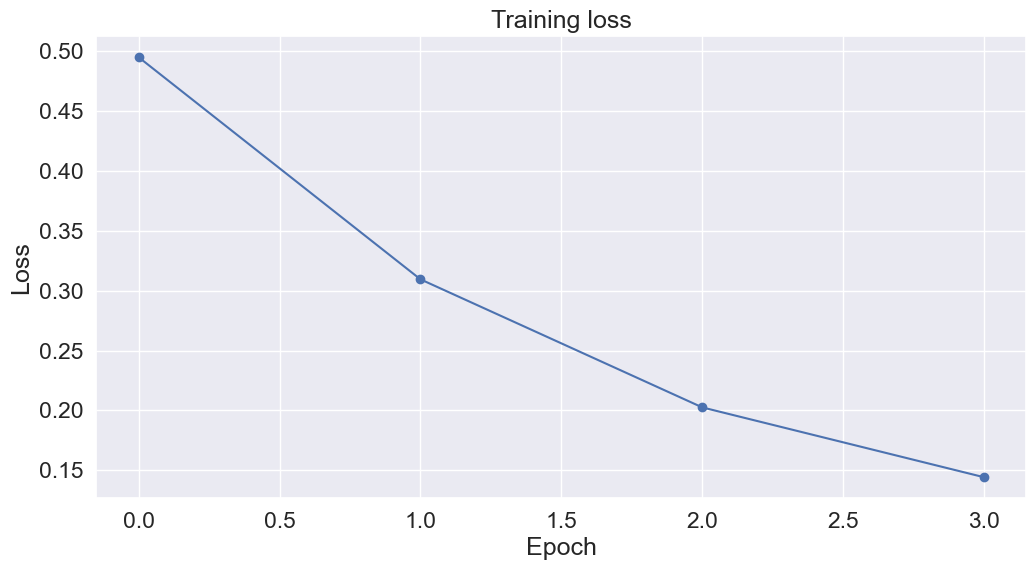

In [47]:
import matplotlib.pyplot as plt
#% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(loss_values, 'b-o')

# Label the plot.
plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

In [48]:
loss_values

[0.49490247710117163,
 0.3094328137045085,
 0.20248574482980358,
 0.14414774401584848]

In [49]:
import plotly.express as px

f = pd.DataFrame(loss_values)
f.columns=['Loss']
fig = px.line(f, x=f.index, y=f.Loss)
fig.update_layout(title='Training loss of the Model',
                   xaxis_title='Epoch',
                   yaxis_title='Loss')
fig.show()

## Performance on Test Set

In [50]:
# Load the dataset into a pandas dataframe.
df = pd.read_csv("out_of_domain_dev.tsv", delimiter='\t', header=None, names=['sentence_source', 'label', 'label_notes', 'sentence'])

# Report the number of sentences.
print('Number of test sentences: {:,}\n'.format(df.shape[0]))


Number of test sentences: 516



In [51]:
df.head(10)

sentence_source  label label_notes  \
0           clc95      1         NaN   
1           clc95      1         NaN   
2           clc95      1         NaN   
3           clc95      1         NaN   
4           clc95      1         NaN   
5           clc95      1         NaN   
6           clc95      0           *   
7           clc95      0           *   
8           clc95      1         NaN   
9           clc95      1         NaN   

                                            sentence  
0                    Somebody just left - guess who.  
1  They claimed they had settled on something, bu...  
2          If Sam was going, Sally would know where.  
3  They're going to serve the guests something, b...  
4               She's reading. I can't imagine what.  
5  John said Joan saw someone from her graduating...  
6              John ate dinner but I don't know who.  
7  She mailed John a letter, but I don't know to ...  
8                   I served leek soup to my guests.  
9                                I served my guests.

In [52]:
# Create sentence and label lists
sentences = df.sentence.values
labels = df.label.values

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []

# For every sentence...
for sent in sentences:
    # `encode` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    encoded_sent = tokenizer.encode(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                   )
    
    input_ids.append(encoded_sent)

# Pad our input tokens
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, 
                          dtype="long", truncating="post", padding="post")

# Create attention masks
attention_masks = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask) 

# Convert to tensors.
prediction_inputs = torch.tensor(input_ids)
prediction_masks = torch.tensor(attention_masks)
prediction_labels = torch.tensor(labels)

# Set the batch size.  
batch_size = 32  

# Create the DataLoader.
prediction_data = TensorDataset(prediction_inputs, prediction_masks, prediction_labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

## Evaluate on Test Set

In [53]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(prediction_inputs)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []


Predicting labels for 516 test sentences...


In [54]:
# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

  logits = outputs[0]

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('DONE.')

DONE.


In [55]:
print('Positive samples: %d of %d (%.2f%%)' % (df.label.sum(), len(df.label), (df.label.sum() / len(df.label) * 100.0)))

Positive samples: 354 of 516 (68.60%)


In [56]:
from sklearn.metrics import matthews_corrcoef

matthews_set = []

# Evaluate each test batch using Matthew's correlation coefficient
print('Calculating Matthews Corr. Coef. for each batch...')

# For each input batch...
for i in range(len(true_labels)):
  
  # The predictions for this batch are a 2-column ndarray (one column for "0" 
  # and one column for "1"). Pick the label with the highest value and turn this
  # in to a list of 0s and 1s.
  pred_labels_i = np.argmax(predictions[i], axis=1).flatten()
  
  # Calculate and store the coef for this batch.  
  matthews = matthews_corrcoef(true_labels[i], pred_labels_i)                
  matthews_set.append(matthews)

Calculating Matthews Corr. Coef. for each batch...


C:\Users\Naim Cavin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:873: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Naim Cavin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:873: RuntimeWarning:

invalid value encountered in double_scalars



In [57]:
matthews_set

[0.049286405809014416,
 -0.050964719143762556,
 0.4040950971038548,
 0.34151450937027694,
 0.5945883900105632,
 0.7410010097502685,
 0.4152273992686999,
 0.0,
 1.0,
 0.7704873741021288,
 0.8459051693633014,
 0.647150228929434,
 0.8150678894028793,
 0.7948717948717948,
 0.38461538461538464,
 0.5844155844155844,
 0.0]

In [58]:
# Combine the predictions for each batch into a single list of 0s and 1s.
flat_predictions = [item for sublist in predictions for item in sublist]
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = [item for sublist in true_labels for item in sublist]

# Calculate the MCC
mcc = matthews_corrcoef(flat_true_labels, flat_predictions)

print('MCC: %.3f' % mcc)

MCC: 0.560


In [59]:
## for data
import json
import pandas as pd
import numpy as np
from sklearn import metrics, manifold
## for processing
import re
import nltk
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for w2v
import gensim
import gensim.downloader as gensim_api
## for bert
import transformers

In [60]:
df = pd.read_csv("finalmerged.csv")
print(df.shape)
df.head()

(31463, 2)


id                                              final
0  esw9zn  ayou brushfire relief charity bundles drive rp...
1  ess8fe  prince charles need new economic model planet ...
2  esloit  china moving phase singleuse plastics starting...
3  esfx97                    microsoft plans carbon negative
4  escvi1                               looking good big oil

In [61]:
a = pd.read_csv("Green-comments-before2020.csv")
b = pd.read_csv("sustainability-comments-before2020.csv")

In [62]:
merged = pd.concat([a,b],ignore_index=True)
merged.head()

id submission_id                                               body  \
0  ffbxc48        ess8fe  An alternative economic model is needed, but N...   
1  ffc5i6h        ess8fe  \*splutters tea everywhere\* The dude _owns_ t...   
2  ff8z7yf        esc09d  This is garbage.\n\nHalf of these aren't even ...   
3  ff8znss        esc09d  Hello, thank you for your comment. \nI am myse...   
4  ff8i5we        es722y  It sounds great using wood and wooden building...   

   created_utc   parent_id                                          permalink  
0   1579785808   t3_ess8fe  /r/Green/comments/ess8fe/prince_charles_we_nee...  
1   1579792001   t3_ess8fe  /r/Green/comments/ess8fe/prince_charles_we_nee...  
2   1579700709   t3_esc09d  /r/Green/comments/esc09d/did_you_know_all_of_t...  
3   1579701058  t1_ff8z7yf  /r/Green/comments/esc09d/did_you_know_all_of_t...  
4   1579679578   t3_es722y  /r/Green/comments/es722y/the_hottest_new_thing...

In [63]:
df = pd.DataFrame(merged, columns = ["id", "body"])

In [64]:
df = df.rename(columns={'body': 'content'})

In [65]:
c = pd.read_csv("Green-submission-before2020.csv")
d = pd.read_csv("sustainability-submission-before2020.csv")

In [66]:
merged2 = pd.concat([c,d],ignore_index=True)
merged2.head()

id  created_utc                                              title  \
0  esw9zn   1579800339  AU Brushfire Relief Charity Bundles - Drive Th...   
1  ess8fe   1579781539  Prince Charles: We need a new economic model o...   
2  esloit   1579742327  China is moving to phase out single-use plasti...   
3  esfx97   1579717268      Microsoft Plans to be Carbon Negative by 2030   
4  escvi1   1579704085               It's not looking good for Big Oil :)   

  selftext                                          full_link  
0      NaN  https://www.reddit.com/r/Green/comments/esw9zn...  
1      NaN  https://www.reddit.com/r/Green/comments/ess8fe...  
2      NaN  https://www.reddit.com/r/Green/comments/esloit...  
3      NaN  https://www.reddit.com/r/Green/comments/esfx97...  
4      NaN  https://www.reddit.com/r/Green/comments/escvi1...

In [67]:
df2 = pd.DataFrame(merged2, columns = ["id","title", "selftext"])
df2.shape

(10773, 3)

In [69]:
import numpy as np
df2['selftext'] = df2['selftext'].replace("[deleted]", "")
df2['selftext'] = df2['selftext'].replace("[removed]", "")
df2['selftext'] = df2['selftext'].replace("<not selftext available>", "")
df2['selftext'] = df2['selftext'].replace(np.nan," ")

In [70]:
df2["content"] = df2["title"] +" "+ df2["selftext"]
df2.head()

id                                              title selftext  \
0  esw9zn  AU Brushfire Relief Charity Bundles - Drive Th...            
1  ess8fe  Prince Charles: We need a new economic model o...            
2  esloit  China is moving to phase out single-use plasti...            
3  esfx97      Microsoft Plans to be Carbon Negative by 2030            
4  escvi1               It's not looking good for Big Oil :)            

                                             content  
0  AU Brushfire Relief Charity Bundles - Drive Th...  
1  Prince Charles: We need a new economic model o...  
2  China is moving to phase out single-use plasti...  
3    Microsoft Plans to be Carbon Negative by 2030    
4             It's not looking good for Big Oil :)

In [71]:
df3 = pd.DataFrame(df2, columns = ["id","content"])

In [72]:
merged_final = pd.concat([df,df3],ignore_index=True)
print(merged_final.shape)
merged_final.head()

(33239, 2)


id                                            content
0  ffbxc48  An alternative economic model is needed, but N...
1  ffc5i6h  \*splutters tea everywhere\* The dude _owns_ t...
2  ff8z7yf  This is garbage.\n\nHalf of these aren't even ...
3  ff8znss  Hello, thank you for your comment. \nI am myse...
4  ff8i5we  It sounds great using wood and wooden building...

In [73]:
#export to csv
merged_final.to_csv( "finalmerged.csv", index=False, encoding='utf-8-sig')

In [74]:
df1 = merged_final.copy()

In [75]:
df1 = df1.rename(columns={'content':'body'})

In [76]:
df1 = df1.loc[df1["body"] != "[deleted]"]
df1 = df1.loc[df1["body"] != "[removed]"]
df1 = df1.loc[df1["body"] != "Sorry, your submission has been automatically removed. Account age too young, spam likely.\\n\\n*I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/Green) if you have any questions or concerns.*"]
df1 = df1.loc[df1["body"] != "Sorry, your submission has been automatically removed. Not enough comment karma, spam likely.\\n\\n*I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/Green) if you have any questions or concerns.*"]
df1 = df1.loc[df1["body"] != "Thank you!"]
df1 = df1.loc[df1["body"] != '!emissionsbot']
df1 = df1.loc[df1["body"] != 'Thank you']
df1 = df1.loc[df1["body"] != 'Thank you.']
df1 = df1.loc[df1["body"] != '/r/careerguidance']
df1 = df1.loc[df1["body"] != 'Thanks!']
df1 = df1.loc[df1["body"] != 'No']
df1 = df1.loc[df1["body"] != 'Lol']
df1 = df1.loc[df1["body"] != 'No.']
df1 = df1.loc[df1["body"] != 'Source?']
df1 = df1.loc[df1["body"] != 'x-post: /r/EnviroNews']
df1 = df1.loc[df1["body"] != 'Thank you!!!']
df1 = df1.loc[df1["body"] != '?']
df1 = df1.loc[df1["body"] != 'Thanks']
df1 = df1.loc[df1["body"] != 'Yes']
df1 = df1.loc[df1["body"] != 'Yes.']
df1 = df1.loc[df1["body"] != 'Thank you!!']
df1 = df1.loc[df1["body"] != ':(']
df1 = df1.loc[df1["body"] != '/r/Green does not allow image submissions.\\n\\n*I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/Green) if you have any questions or concerns.*']
df1 = df1.loc[df1["body"] != 'Green  ']

In [77]:
df1= df1.replace(r'\n',' ', regex=True)

In [78]:
df1 = df1.replace(r'\\n',' ', regex=True)

In [79]:
df1 = df1.replace(r'/r/',' ', regex=True)

In [80]:
df1 = df1.dropna()

In [81]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df1, title="Pandas Profiling Report", explorative=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [82]:
slang_dict = {
"AFAIK": "As Far As I Know",
"AFK": "Away From Keyboard",
"ASAP": "As Soon As Possible",
"ATK": "At The Keyboard",
"ATM": "At The Moment",
"A3": "Anytime, Anywhere, Anyplace",
"BAK": "Back At Keyboard",
"BBL": "Be Back Later",
"BBS": "Be Back Soon",
"BFN": "Bye For Now",
"B4N": "Bye For Now",
"BRB": "Be Right Back",
"BRT": "Be Right There",
"BTW": "By The Way",
"B4": "Before",
"B4N": "Bye For Now",
"CU": "See You",
"CUL8R": "See You Later",
"CYA": "See You",
"FAQ": "Frequently Asked Questions",
"FC": "Fingers Crossed",
"FWIW": "For What It's Worth",
"FYI": "For Your Information",
"GAL": "Get A Life",
"GG": "Good Game",
"GN": "Good Night",
"GMTA": "Great Minds Think Alike",
"GR8": "Great!",
"G9": "Genius",
"OMG": "Surprised",
"IC": "I See",
"ICQ": "I Seek you (also a chat program)",
"ILU": "ILU: I Love You",
"IMHO": "In My Honest / Humble Opinion",
"IMO": "In My Opinion",
"IOW": "In Other Words",
"IRL": "In Real Life",
"KISS": "Keep It Simple, Stupid",
"LDR": "Long Distance Relationship",
"LMAO": "Laugh My Ass Off",
"LOL": "Laughing Out Loud",
"LTNS": "Long Time No See",
"L8R": "Later",
"MTE": "My Thoughts Exactly",
"M8": "Mate",
"NRN": "No Reply Necessary",
"OIC": "Oh I See",
"PITA": "Pain In The Ass",
"PRT": "Party",
"PRW": "Parents Are Watching",
"ROFL": "Rolling On The Floor Laughing",
"ROFLOL": "Rolling On The Floor Laughing Out Loud",
"ROTFLMAO": "Rolling On The Floor Laughing My Ass Off",
"SK8": "Skate",
"STATS": "Your sex and age",
"ASL": "Age, Sex, Location",
"THX": "Thank You",
"TTFN": "Ta-Ta For Now!",
"TTYL": "Talk To You Later",
"U2": "You Too",
"U4E": "Yours For Ever",
"WB": "Welcome Back",
"WTF": "What The Fuck",
"WTG": "Way To Go!",
"WUF": "Where Are You From?",
"W8": "Wait"
}

In [83]:
def slang(x):
    if type(x) is str:
        for key in slang_dict:
            value = slang_dict[key]
            x = x.replace(key,value)
        return x
    else:
        return x

In [84]:
df1["SLANG-ext"] =df1["body"].apply(lambda x: slang(x))

In [85]:
df1.head()

id                                               body  \
0  ffbxc48  An alternative economic model is needed, but N...   
1  ffc5i6h  \*splutters tea everywhere\* The dude _owns_ t...   
2  ff8z7yf  This is garbage.  Half of these aren't even ne...   
3  ff8znss  Hello, thank you for your comment.  I am mysel...   
4  ff8i5we  It sounds great using wood and wooden building...   

                                           SLANG-ext  
0  An alternative economic model is needed, but N...  
1  \*splutters tea everywhere\* The dude _owns_ t...  
2  This is garbage.  Half of these aren't even ne...  
3  Hello, thank you for your comment.  I am mysel...  
4  It sounds great using wood and wooden building...

In [86]:
contractions_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"here's": "here is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [87]:
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions_dict:
            value = contractions_dict[key]
            x = x.lower().replace(key,value)
        return x
    else:
        return x

In [88]:
df1["Cont-Exp"] =df1["SLANG-ext"].apply(lambda x: cont_to_exp(x))

In [115]:
dfx = pd.DataFrame(df1, columns = ["id", "body"])

In [116]:
def preprocess(df):
    
    df= df.apply(nfx.remove_urls)
    df= df.apply(nfx.remove_special_characters)
    df= df.apply(nfx.remove_emojis)
    df= df.apply(nfx.remove_numbers)
    df= df.apply(nfx.remove_puncts)
    df= df.apply(nfx.remove_hashtags)
    df= df.apply(nfx.remove_currencies)
    df= df.apply(lambda x: x.lower())
    df= df.apply(nfx.remove_multiple_spaces)
    df= df.apply(nfx.remove_stopwords)
    
    return df

In [93]:
import neattext.functions as nfx

In [117]:
dfx["body"] =[each for each in preprocess(dfx["body"])]
dfx.head()

id                                               body
0  ffbxc48  alternative economic model needed native ameri...
1  ffc5i6h  splutters tea dude owns duchy cornwall sure he...
2  ff8z7yf  garbage half arent necessarily correct didnt s...
3  ff8znss  hello thank comment dedicated learn strive eco...
4  ff8i5we  sounds great wood wooden buildings look nice d...

In [118]:
def utils_preprocess_text(text, flg_lemm=True, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()    
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

In [119]:
dfx["text_clean"] = dfx["body"].apply(lambda x: 
          utils_preprocess_text(x, flg_lemm=True, 
          lst_stopwords=lst_stopwords))
dfx.head()

id                                               body  \
0  ffbxc48  alternative economic model needed native ameri...   
1  ffc5i6h  splutters tea dude owns duchy cornwall sure he...   
2  ff8z7yf  garbage half arent necessarily correct didnt s...   
3  ff8znss  hello thank comment dedicated learn strive eco...   
4  ff8i5we  sounds great wood wooden buildings look nice d...   

                                          text_clean  
0  alternative economic model needed native ameri...  
1  splutter tea dude owns duchy cornwall sure he ...  
2  garbage half arent necessarily correct didnt s...  
3  hello thank comment dedicated learn strive eco...  
4  sound great wood wooden building look nice def...

In [106]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\Naim
[nltk_data]     Cavin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Naim
[nltk_data]     Cavin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [107]:
import numpy as np
import nltk
from nltk.corpus import stopwords
import gensim
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize

In [120]:
def get_lda_objects(text):
    nltk.download('stopwords')    
    stop=set(stopwords.words('english'))

    
    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    dic=gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]
    
    lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 3, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
    return lda_model, bow_corpus, dic

In [121]:
lda_model, bow_corpus, dic = get_lda_objects(dfx["text_clean"])

[nltk_data] Downloading package stopwords to C:\Users\Naim
[nltk_data]     Cavin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [122]:
lda_model.show_topics()

[(0,
  '0.013*"plastic" + 0.010*"water" + 0.009*"use" + 0.009*"waste" + 0.009*"food" + 0.007*"dont" + 0.007*"like" + 0.006*"sustainable" + 0.006*"meat" + 0.006*"buy"'),
 (1,
  '0.013*"climate" + 0.012*"energy" + 0.011*"green" + 0.010*"change" + 0.006*"solar" + 0.006*"power" + 0.006*"world" + 0.005*"new" + 0.005*"carbon" + 0.005*"emission"'),
 (2,
  '0.014*"sustainability" + 0.011*"sustainable" + 0.010*"people" + 0.009*"like" + 0.006*"think" + 0.006*"help" + 0.006*"good" + 0.005*"dont" + 0.005*"know" + 0.005*"way"')]

In [103]:
nlp = gensim_api.load("glove-wiki-gigaword-300")

[==================================================] 100.0% 376.1/376.1MB downloaded


In [104]:
nlp.most_similar(["obama"], topn=3)

[('barack', 0.9254721403121948),
 ('mccain', 0.7590768337249756),
 ('bush', 0.7570987939834595)]

In [105]:
## Function to apply
def get_similar_words(lst_words, top, nlp):
    lst_out = lst_words
    for tupla in nlp.most_similar(lst_words, topn=top):
        lst_out.append(tupla[0])
    return list(set(lst_out))

In [131]:
## Create Dictionary {category:[keywords]}
dic_clusters = {}

dic_clusters["FIRST"] = get_similar_words(['plastic','water','use','waste',"food"], 
                  top=10, nlp=nlp)

dic_clusters["SECOND"] = get_similar_words(['climate','energy','green','change','solar', 'power','world', 'carbon', 'emission']
                  , top=10, nlp=nlp)

dic_clusters["THIRD"] = get_similar_words(['sustainability','sustainable','people','like','think',
                   'help','way'], 
                   top=10, nlp=nlp)

## print some
for k,v in dic_clusters.items():
    print(k, ": ", v[0:5], "...", len(v))

FIRST :  ['use', 'food', 'waste', 'materials', 'plastic'] ... 15
SECOND :  ['world', 'greenhouse', 'dioxide', 'gas', 'green'] ... 19
THIRD :  ['think', 'sustainable', 'well', 'want', 'way'] ... 17


Let’s try to visualize those keywords in a 2D space by applying a dimensionality reduction algorithm (i.e. TSNE). We want to make sure that the clusters are well separated from each other.

In [132]:
## word embedding
tot_words = [word for v in dic_clusters.values() for word in v]
X = nlp[tot_words]

In [133]:
## pca
pca = manifold.TSNE(perplexity=40, n_components=2, init='pca')
X = pca.fit_transform(X)

In [134]:
dtf = dfx.copy()

In [135]:
## create dtf
dtf = pd.DataFrame()
for k,v in dic_clusters.items():
    size = len(dtf) + len(v)
    dtf_group = pd.DataFrame(X[len(dtf):size], columns=["x","y"], 
                             index=v)
    dtf_group["cluster"] = k
    dtf = dtf.append(dtf_group)

In [129]:
%matplotlib inline

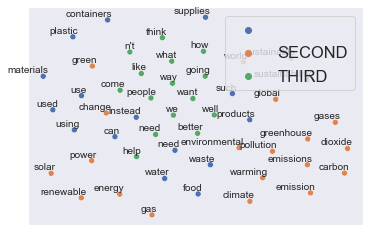

In [136]:
## plot
fig, ax = plt.subplots()
sns.scatterplot(data=dtf, x="x", y="y", hue="cluster", ax=ax)
ax.legend().texts[0].set_text(None)
ax.set(xlabel=None, ylabel=None, xticks=[], xticklabels=[], 
       yticks=[], yticklabels=[])
for i in range(len(dtf)):
    ax.annotate(dtf.index[i], 
               xy=(dtf["x"].iloc[i],dtf["y"].iloc[i]), 
               xytext=(5,2), textcoords='offset points', 
               ha='right', va='bottom')

## Feature Engineering
It’s time to embed the corpus we preprocessed and the target clusters we created in the same vector space.

Yes, I’m using BERT for this. It’s true that you could utilize any Word Embedding model (i.e. Word2Vec, Glove, …), even the one that we already loaded to define keywords, so why bother to use such a heavy and complex language model? That’s because BERT doesn’t apply a fixed embedding, instead it looks at the entire sentence and then assigns an embedding to each word. Therefore, the vector BERT assigns to a word is a function of the entire sentence, so that a word can have different vectors based on the contexts.
I’m going to load the original pre-trained version of BERT with the package transformers and give an example of the dynamic embedding:

In [166]:
dfx.head()

id                                               body  \
0  ffbxc48  alternative economic model needed native ameri...   
1  ffc5i6h  splutters tea dude owns duchy cornwall sure he...   
2  ff8z7yf  garbage half arent necessarily correct didnt s...   
3  ff8znss  hello thank comment dedicated learn strive eco...   
4  ff8i5we  sounds great wood wooden buildings look nice d...   

                                          text_clean  
0  alternative economic model needed native ameri...  
1  splutter tea dude owns duchy cornwall sure he ...  
2  garbage half arent necessarily correct didnt s...  
3  hello thank comment dedicated learn strive eco...  
4  sound great wood wooden building look nice def...

In [277]:
dtf = pd.DataFrame(dfx, columns = ["id", "text_clean"])

In [176]:
import warnings
warnings.filterwarnings("ignore")
from nlp_utils import *

In [177]:
def add_detect_lang(data, column):
    dtf = data.copy()
    dtf['lang'] = dtf[column].apply(lambda x: langdetect.detect(x) if x.strip() != "" else "")
    return dtf

In [178]:
import langdetect 

# this takes a while
dtf = add_detect_lang(dtf, "text_clean")
dtf.head()

id                                         text_clean lang
0  ffbxc48  alternative economic model needed native ameri...   en
1  ffc5i6h  splutter tea dude owns duchy cornwall sure he ...   en
2  ff8z7yf  garbage half arent necessarily correct didnt s...   en
3  ff8znss  hello thank comment dedicated learn strive eco...   en
4  ff8i5we  sound great wood wooden building look nice def...   en

In [181]:
# check
i = 0
print(dtf["text_clean"].iloc[i], " --> ", dtf["lang"].iloc[i])

alternative economic model needed native american aboriginal australian indigenous people provide model thousand year work west colonized land silenced erased way living need new model listen voice prince ancestor conquered killed capitalism indigenous thought  -->  en


In [187]:
import spacy

In [189]:
ner = spacy.load("en_core_web_sm")

In [190]:
lst_tag_type = ["ORG","PERSON","NORP","GPE","LOC","FAC","EVENT","PRODUCT","WORK_OF_ART"]

In [192]:
def ner_displacy(txt, ner=None, lst_tag_filter=None, title=None, serve=False):
    ner = spacy.load("en_core_web_lg") if ner is None else ner
    doc = ner(txt)
    doc.user_data["title"] = title
    if serve == True:
        spacy.displacy.serve(doc, style="ent", options={"ents":lst_tag_filter})
    else:
        spacy.displacy.render(doc, style="ent", options={"ents":lst_tag_filter})

In [200]:
from timeit import default_timer as timer

start = timer()
ner_displacy(dtf["text_clean"].iloc[0], ner, lst_tag_type, title="NER example")
end = timer()
print(end - start)

0.012586600001668558


In [195]:
def utils_ner_text(txt, ner=None, lst_tag_filter=None, grams_join="_"):
    ## apply model
    ner = spacy.load("en_core_web_lg") if ner is None else ner
    entities = ner(txt).ents

    ## tag text
    tagged_txt = txt
    for tag in entities:
        if (lst_tag_filter is None) or (tag.label_ in lst_tag_filter):
            try:
                tagged_txt = re.sub(tag.text, grams_join.join(tag.text.split()), tagged_txt) #it breaks with wild characters like *+
            except Exception as e:
                continue

    ## extract tags list
    if lst_tag_filter is None:
        lst_tags = [(tag.text, tag.label_) for tag in entities]  #list(set([(word.text, word.label_) for word in ner(x).ents]))
    else: 
        lst_tags = [(word.text, word.label_) for word in entities if word.label_ in lst_tag_filter]

    return tagged_txt, lst_tags

In [197]:
# example of replacing text and tags extraction
utils_ner_text(dtf["text_clean"].iloc[0], ner, lst_tag_type, grams_join="_")

('alternative economic model needed native_american aboriginal australian indigenous people provide model thousand year work west colonized land silenced erased way living need new model listen voice prince ancestor conquered killed capitalism indigenous thought',
 [('native american', 'NORP'), ('australian', 'NORP'), ('west', 'LOC')])

In [220]:
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter
import collections

In [221]:
def utils_lst_count(lst, top=None):
    dic_counter = collections.Counter()
    for x in lst:
        dic_counter[x] += 1
    dic_counter = collections.OrderedDict(sorted(dic_counter.items(), key=lambda x: x[1], reverse=True))
    lst_top = [ {key:value} for key,value in dic_counter.items() ]
    if top is not None:
        lst_top = lst_top[:top]
    return lst_top

In [222]:
def utils_ner_features(lst_dics_tuples, tag):
    if len(lst_dics_tuples) > 0:
        tag_type = []
        for dic_tuples in lst_dics_tuples:
            for tuple in dic_tuples:
                type, n = tuple[1], dic_tuples[tuple]
                tag_type = tag_type + [type]*n
                dic_counter = collections.Counter()
                for x in tag_type:
                    dic_counter[x] += 1
        return dic_counter[tag]   #pd.DataFrame([dic_counter])
    else:
        return 0

In [223]:
def add_ner_spacy(data, column, ner=None, lst_tag_filter=None, grams_join="_", create_features=True):
    ner = spacy.load("en_core_web_lg") if ner is None else ner
    dtf = data.copy()

    ## tag text and exctract tags
    print("--- tagging ---")
    dtf[[column+"_tagged", "tags"]] = dtf[[column]].apply(lambda x: utils_ner_text(x[0], ner, lst_tag_filter, grams_join), 
                                                          axis=1, result_type='expand')

    ## put all tags in a column
    print("--- counting tags ---")
    dtf["tags"] = dtf["tags"].apply(lambda x: utils_lst_count(x, top=None))
    
    ## extract features
    if create_features == True:
        print("--- creating features ---")
        ### features set
        tags_set = []
        for lst in dtf["tags"].tolist():
            for dic in lst:
                for k in dic.keys():
                    tags_set.append(k[1])
        tags_set = list(set(tags_set))
        ### create columns
        for feature in tags_set:
            dtf["tags_"+feature] = dtf["tags"].apply(lambda x: utils_ner_features(x, feature))
    return dtf

In [224]:

start = timer()
# this takes a while
dtf = add_ner_spacy(dtf, "text_clean", ner, lst_tag_type, grams_join="_", create_features=True)
dtf.head()
end = timer()
print(end - start)

--- tagging ---
--- counting tags ---
--- creating features ---
183.20062819999293


In [225]:
dtf.head()

id                                         text_clean lang  \
0  ffbxc48  alternative economic model needed native ameri...   en   
1  ffc5i6h  splutter tea dude owns duchy cornwall sure he ...   en   
2  ff8z7yf  garbage half arent necessarily correct didnt s...   en   
3  ff8znss  hello thank comment dedicated learn strive eco...   en   
4  ff8i5we  sound great wood wooden building look nice def...   en   

                                   text_clean_tagged  \
0  alternative economic model needed native_ameri...   
1  splutter_tea_dude owns duchy cornwall sure he ...   
2  garbage half arent necessarily correct didnt s...   
3  hello thank comment dedicated learn strive eco...   
4  sound great wood wooden building look nice def...   

                                                tags  tags_EVENT  \
0  [{('native american', 'NORP'): 1}, {('australi...           0   
1             [{('splutter tea dude', 'PERSON'): 1}]           0   
2                                                 []           0   
3                                                 []           0   
4                               [{('us', 'GPE'): 1}]           0   

   tags_PRODUCT  tags_WORK_OF_ART  tags_PERSON  tags_NORP  tags_GPE  tags_ORG  \
0             0                 0            0          2         0         0   
1             0                 0            1          0         0         0   
2             0                 0            0          0         0         0   
3             0                 0            0          0         0         0   
4             0                 0            0          0         1         0   

   tags_LOC  tags_FAC  
0         1         0  
1         0         0  
2         0         0  
3         0         0  
4         0         0

In [229]:
# check
i = 0
print(dtf["text_clean"].iloc[i], " --> ")
print(dtf["text_clean_tagged"].iloc[i])
print("tags:")
dtf["tags"].iloc[i]

alternative economic model needed native american aboriginal australian indigenous people provide model thousand year work west colonized land silenced erased way living need new model listen voice prince ancestor conquered killed capitalism indigenous thought  --> 
alternative economic model needed native_american aboriginal australian indigenous people provide model thousand year work west colonized land silenced erased way living need new model listen voice prince ancestor conquered killed capitalism indigenous thought
tags:


[{('native american', 'NORP'): 1},
 {('australian', 'NORP'): 1},
 {('west', 'LOC'): 1}]

In [231]:
def tags_freq(tags, top=30, figsize=(10,5)):   
    tags_list = tags.sum()
    map_lst = list(map(lambda x: list(x.keys())[0], tags_list))
    dtf_tags = pd.DataFrame(map_lst, columns=['tag','type'])
    dtf_tags["count"] = 1
    dtf_tags = dtf_tags.groupby(['type','tag']).count().reset_index().sort_values("count", ascending=False)
    fig, ax = plt.subplots(figsize=figsize)
    fig.suptitle("Top frequent tags", fontsize=12)
    sns.barplot(x="count", y="tag", hue="type", data=dtf_tags.iloc[:top,:], dodge=False, ax=ax)
    ax.set(ylabel=None)
    ax.grid(axis="x")
    plt.show()
    return dtf_tags

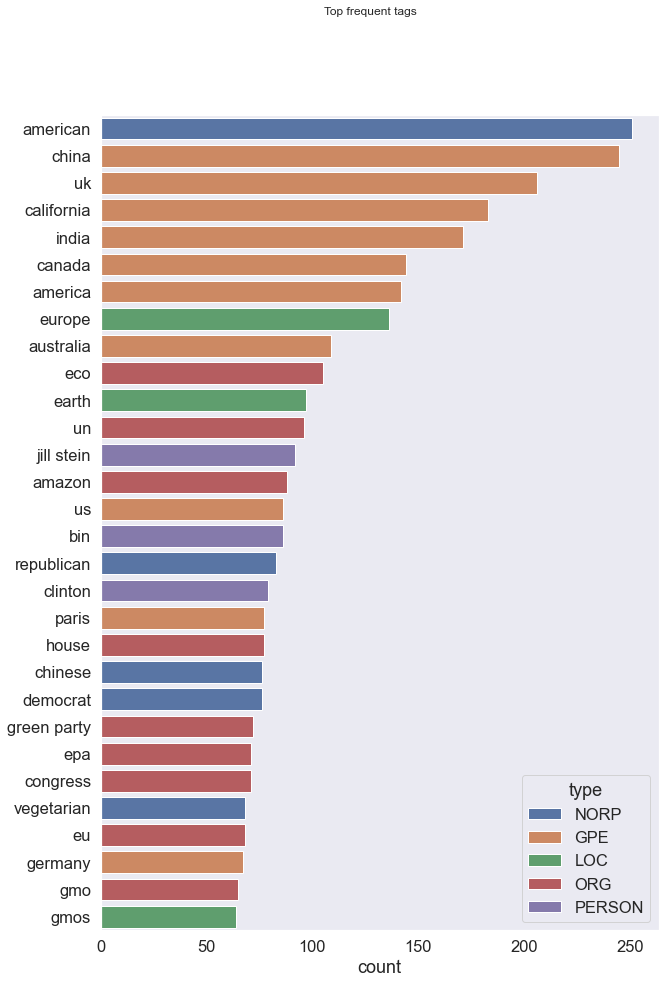

In [235]:
common_tags = tags_freq(tags=dtf["tags"], top=30, figsize=(10,15))

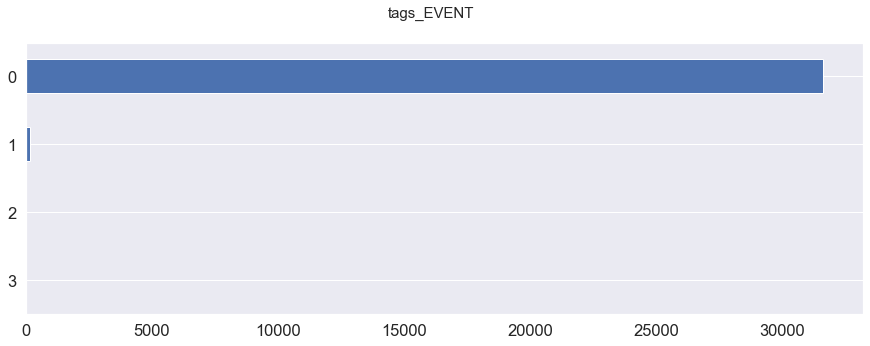

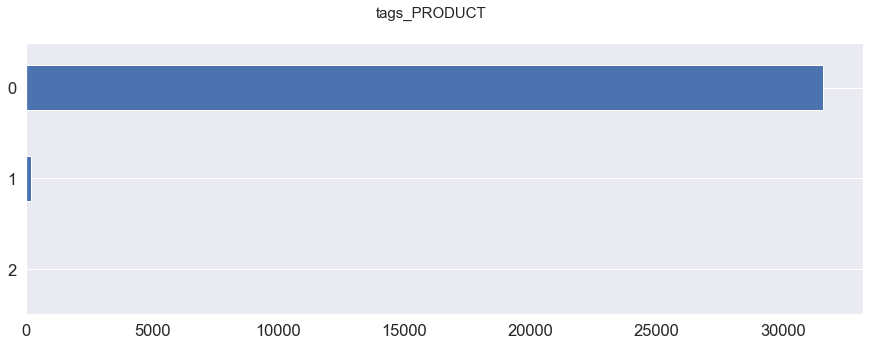

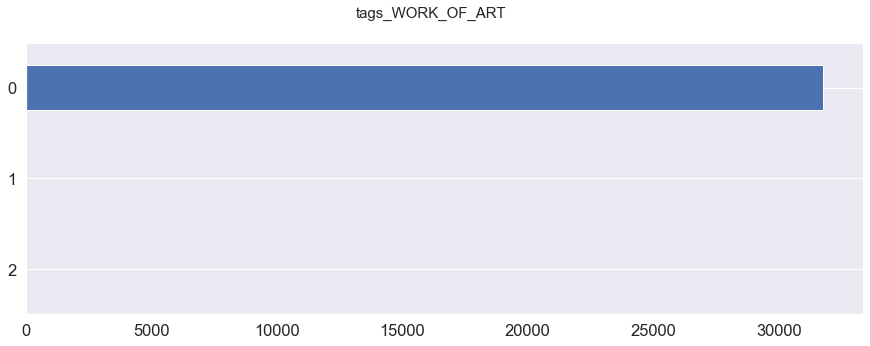

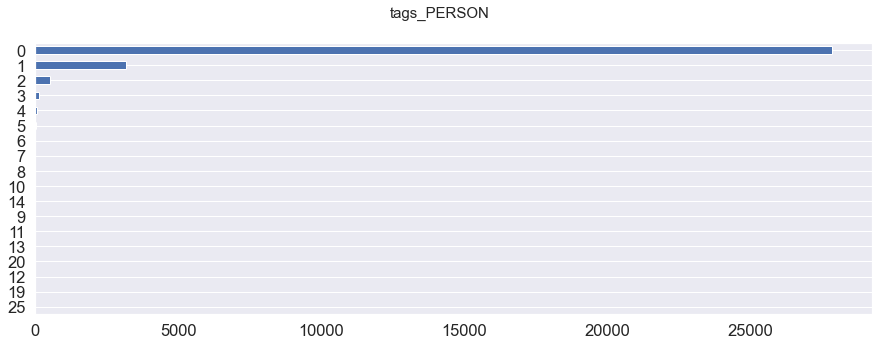

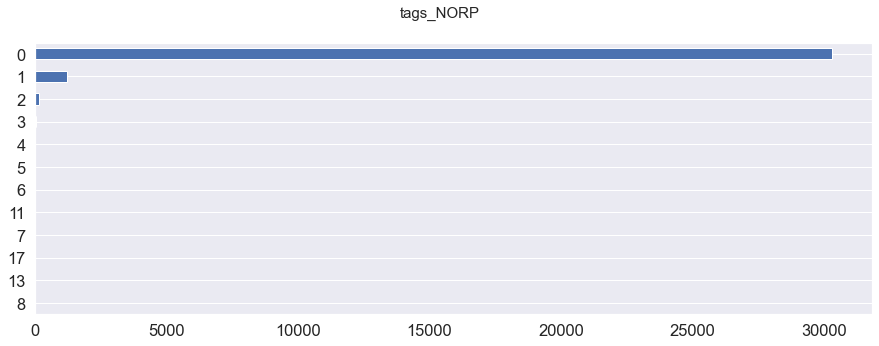

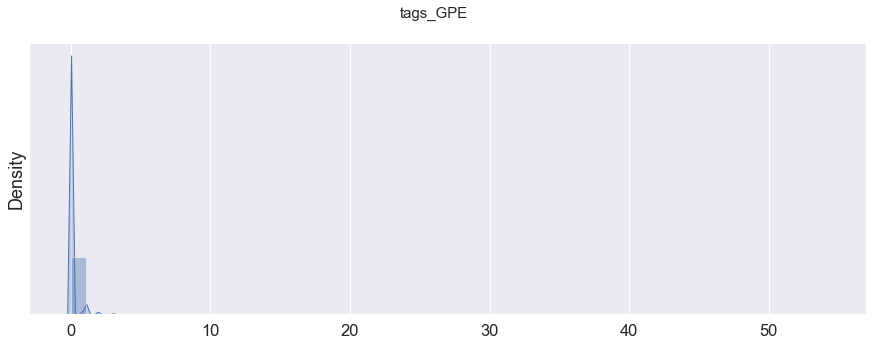

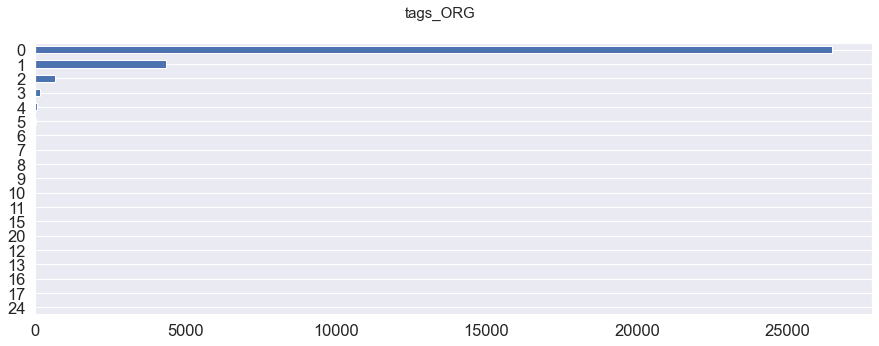

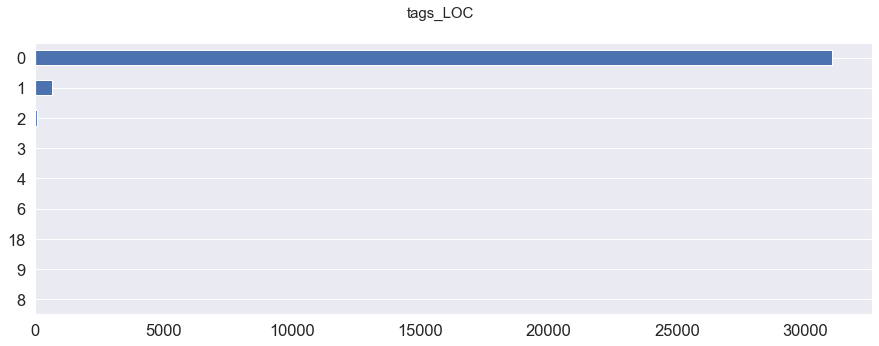

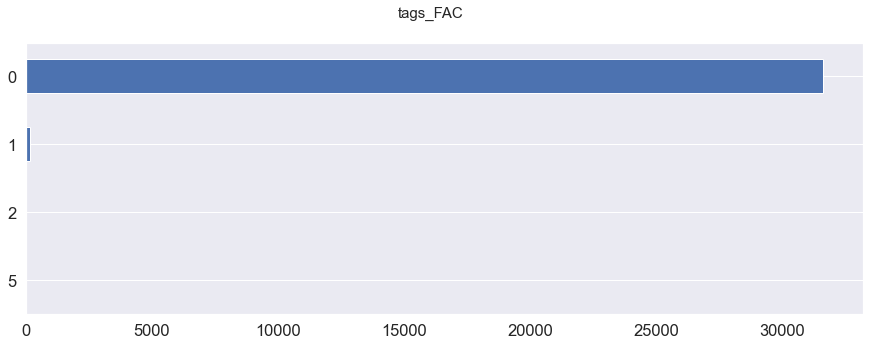

In [237]:
# tags bivariate distribution
for x in dtf.filter(like="tags_", axis=1).columns:
    plot_distributions(dtf, x=x, bins=None, figsize=(15,5))

In [238]:
def add_text_length(data, column):
    dtf = data.copy()
    dtf['word_count'] = dtf[column].apply(lambda x: len(nltk.word_tokenize(str(x))) )
    dtf['char_count'] = dtf[column].apply(lambda x: sum(len(word) for word in nltk.word_tokenize(str(x))) )
    dtf['sentence_count'] = dtf[column].apply(lambda x: len(nltk.sent_tokenize(str(x))) )
    dtf['avg_word_length'] = dtf['char_count'] / dtf['word_count']
    dtf['avg_sentence_lenght'] = dtf['word_count'] / dtf['sentence_count']
    print(dtf[['char_count','word_count','sentence_count','avg_word_length','avg_sentence_lenght']].describe().T[["min","mean","max"]])
    return dtf

In [239]:
dtf = add_text_length(dtf, "text_clean")
dtf.head()

                     min        mean     max
char_count           0.0  130.712929  8500.0
word_count           0.0   20.661812  1334.0
sentence_count       0.0    0.992293     1.0
avg_word_length      1.0    6.270336    95.0
avg_sentence_lenght  1.0   20.822286  1334.0


id                                         text_clean lang  \
0  ffbxc48  alternative economic model needed native ameri...   en   
1  ffc5i6h  splutter tea dude owns duchy cornwall sure he ...   en   
2  ff8z7yf  garbage half arent necessarily correct didnt s...   en   
3  ff8znss  hello thank comment dedicated learn strive eco...   en   
4  ff8i5we  sound great wood wooden building look nice def...   en   

                                   text_clean_tagged  \
0  alternative economic model needed native_ameri...   
1  splutter_tea_dude owns duchy cornwall sure he ...   
2  garbage half arent necessarily correct didnt s...   
3  hello thank comment dedicated learn strive eco...   
4  sound great wood wooden building look nice def...   

                                                tags  tags_EVENT  \
0  [{('native american', 'NORP'): 1}, {('australi...           0   
1             [{('splutter tea dude', 'PERSON'): 1}]           0   
2                                                 []           0   
3                                                 []           0   
4                               [{('us', 'GPE'): 1}]           0   

   tags_PRODUCT  tags_WORK_OF_ART  tags_PERSON  tags_NORP  tags_GPE  tags_ORG  \
0             0                 0            0          2         0         0   
1             0                 0            1          0         0         0   
2             0                 0            0          0         0         0   
3             0                 0            0          0         0         0   
4             0                 0            0          0         1         0   

   tags_LOC  tags_FAC  word_count  char_count  sentence_count  \
0         1         0          34         227               1   
1         0         0          17         110               1   
2         0         0          19         114               1   
3         0         0          31         178               1   
4         0         0          67         379               1   

   avg_word_length  avg_sentence_lenght  
0         6.676471                 34.0  
1         6.470588                 17.0  
2         6.000000                 19.0  
3         5.741935                 31.0  
4         5.656716                 67.0

In [240]:
# check
i = 0
print(dtf["text_clean"].iloc[i], " --> ")
for col in ["word_count","char_count","sentence_count","avg_word_length","avg_sentence_lenght"]:
    print(col+":", dtf[col].iloc[i])

alternative economic model needed native american aboriginal australian indigenous people provide model thousand year work west colonized land silenced erased way living need new model listen voice prince ancestor conquered killed capitalism indigenous thought  --> 
word_count: 34
char_count: 227
sentence_count: 1
avg_word_length: 6.676470588235294
avg_sentence_lenght: 34.0


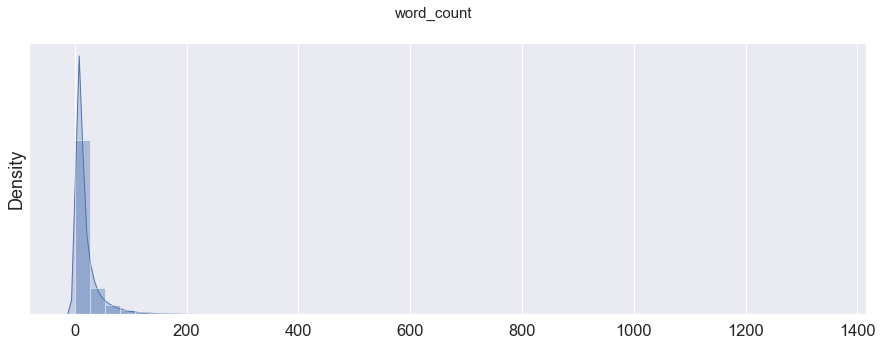

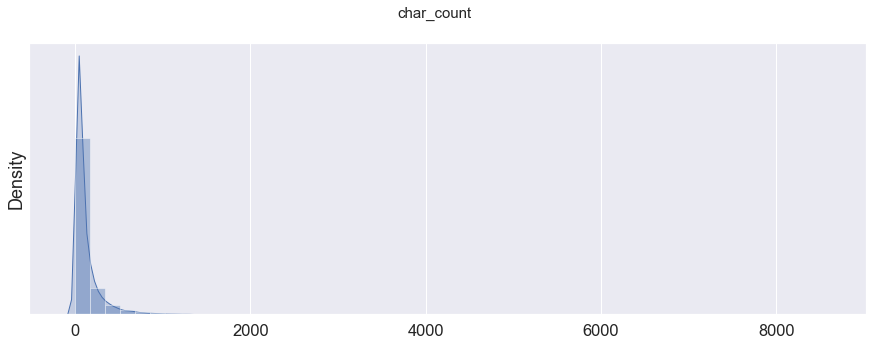

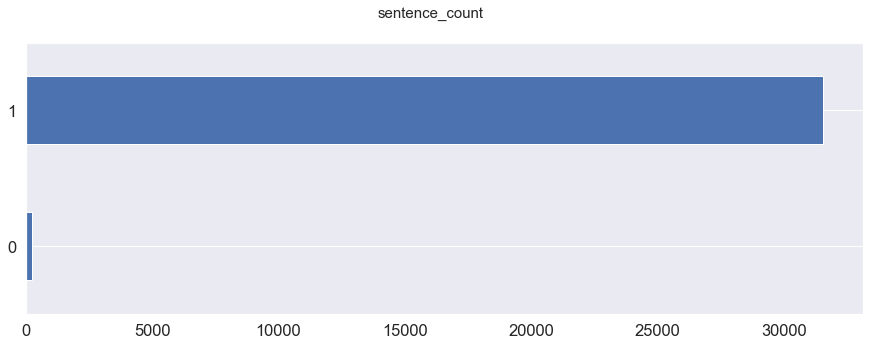

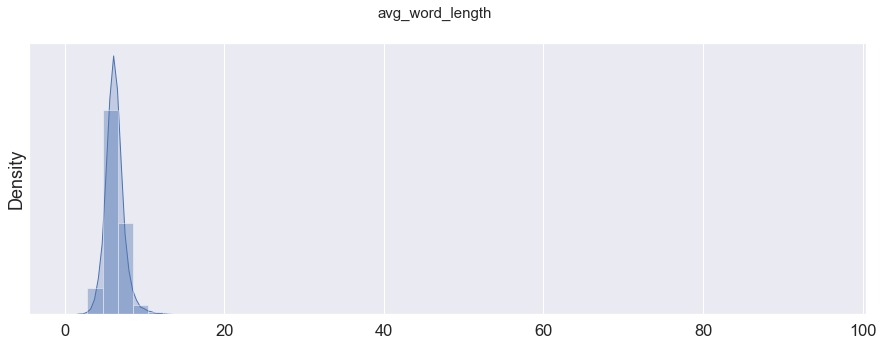

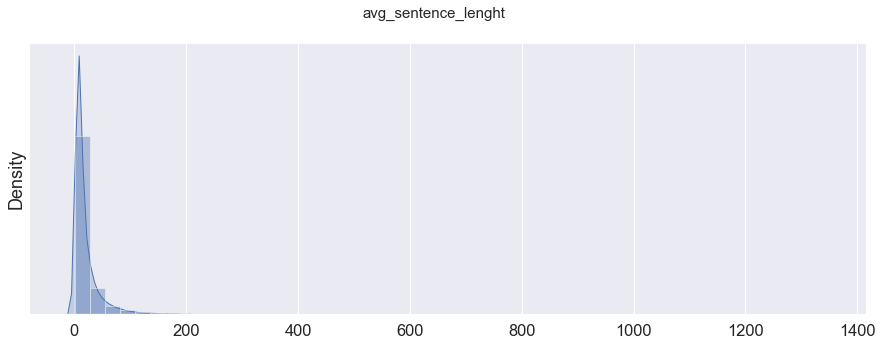

In [241]:
for col in ["word_count","char_count","sentence_count","avg_word_length","avg_sentence_lenght"]:
    plot_distributions(dtf, x=col, bins=10, figsize=(15,5))

In [243]:
def add_sentiment(data, column, algo="vader", sentiment_range=(-1,1)):
    dtf = data.copy()
    ## calculate sentiment
    if algo == "vader":
        vader = SentimentIntensityAnalyzer()
        dtf["sentiment"] = dtf[column].apply(lambda x: vader.polarity_scores(x)["compound"])
    elif algo == "textblob":
        dtf["sentiment"] = dtf[column].apply(lambda x: TextBlob(x).sentiment.polarity)
    ## rescaled
    if sentiment_range != (-1,1):
        dtf["sentiment"] = preprocessing.MinMaxScaler(feature_range=sentiment_range).fit_transform(dtf[["sentiment"]])
    print(dtf[['sentiment']].describe().T)
    return dtf

In [248]:
import TextBlob

ModuleNotFoundError: No module named 'TextBlob'

In [246]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [249]:
from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger

In [250]:
dtf = add_sentiment(dtf, "text_clean", algo="textblob", sentiment_range=(-1,1))
dtf.head()

             count      mean       std  min  25%  50%       75%  max
sentiment  31790.0  0.082246  0.244423 -1.0  0.0  0.0  0.196429  1.0


id                                         text_clean lang  \
0  ffbxc48  alternative economic model needed native ameri...   en   
1  ffc5i6h  splutter tea dude owns duchy cornwall sure he ...   en   
2  ff8z7yf  garbage half arent necessarily correct didnt s...   en   
3  ff8znss  hello thank comment dedicated learn strive eco...   en   
4  ff8i5we  sound great wood wooden building look nice def...   en   

                                   text_clean_tagged  \
0  alternative economic model needed native_ameri...   
1  splutter_tea_dude owns duchy cornwall sure he ...   
2  garbage half arent necessarily correct didnt s...   
3  hello thank comment dedicated learn strive eco...   
4  sound great wood wooden building look nice def...   

                                                tags  tags_EVENT  \
0  [{('native american', 'NORP'): 1}, {('australi...           0   
1             [{('splutter tea dude', 'PERSON'): 1}]           0   
2                                                 []           0   
3                                                 []           0   
4                               [{('us', 'GPE'): 1}]           0   

   tags_PRODUCT  tags_WORK_OF_ART  tags_PERSON  tags_NORP  tags_GPE  tags_ORG  \
0             0                 0            0          2         0         0   
1             0                 0            1          0         0         0   
2             0                 0            0          0         0         0   
3             0                 0            0          0         0         0   
4             0                 0            0          0         1         0   

   tags_LOC  tags_FAC  word_count  char_count  sentence_count  \
0         1         0          34         227               1   
1         0         0          17         110               1   
2         0         0          19         114               1   
3         0         0          31         178               1   
4         0         0          67         379               1   

   avg_word_length  avg_sentence_lenght  sentiment  
0         6.676471                 34.0   0.027273  
1         6.470588                 17.0   0.205000  
2         6.000000                 19.0  -0.116667  
3         5.741935                 31.0   0.261111  
4         5.656716                 67.0   0.275641

In [252]:
# check
i = 0
print(dtf["text_clean"].iloc[i], " --> ", dtf["sentiment"].iloc[i])

alternative economic model needed native american aboriginal australian indigenous people provide model thousand year work west colonized land silenced erased way living need new model listen voice prince ancestor conquered killed capitalism indigenous thought  -->  0.02727272727272727


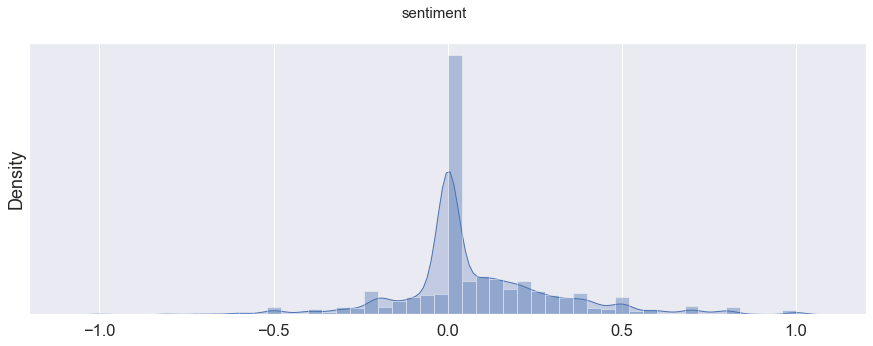

In [253]:
plot_distributions(dtf, x="sentiment", bins=5, figsize=(15,5))

In [255]:
def word_freq(corpus, ngrams=[1,2,3], top=10, figsize=(10,7)):
    lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
    ngrams = [ngrams] if type(ngrams) is int else ngrams
    
    ## calculate
    dtf_freq = pd.DataFrame()
    for n in ngrams:
        dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, n))
        dtf_n = pd.DataFrame(dic_words_freq.most_common(), columns=["word","freq"])
        dtf_n["ngrams"] = n
        dtf_freq = dtf_freq.append(dtf_n)
    dtf_freq["word"] = dtf_freq["word"].apply(lambda x: " ".join(string for string in x) )
    dtf_freq = dtf_freq.sort_values(["ngrams","freq"], ascending=[True,False])
    
    ## plot
    fig, ax = plt.subplots(figsize=figsize)
    sns.barplot(x="freq", y="word", hue="ngrams", dodge=False, ax=ax,
                data=dtf_freq.groupby('ngrams')["ngrams","freq","word"].head(top))
    ax.set(xlabel=None, ylabel=None, title="Most frequent words")
    ax.grid(axis="x")
    plt.show()
    return dtf_freq

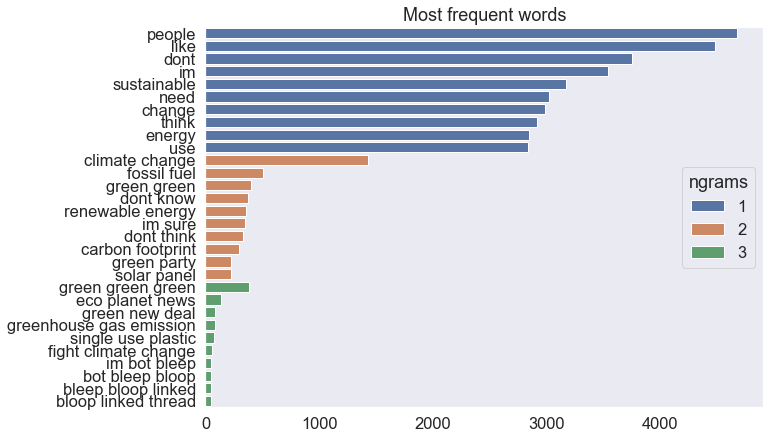

In [257]:
dtf_freq = pd.DataFrame()
dtf_y = word_freq(corpus=dtf["text_clean"], ngrams=[1,2,3], top=10, figsize=(10,7))
    
dtf_freq = dtf_freq.append(dtf_y)

In [258]:
dtf_freq.sample(5)

word  freq  ngrams
516074                 del agua sus     1       3
349187                decided share     1       2
538676        importer resource ton     1       3
243504         concluded glyphosate     1       2
450906  wouldnt benefit educational     1       3

In [268]:
from wordcloud import WordCloud
def plot_wordcloud(corpus, max_words=150, max_font_size=35, figsize=(10,10)):
    wc = WordCloud(background_color='black', max_words=max_words, max_font_size=max_font_size)
    wc = wc.generate(str(corpus)) #if type(corpus) is not dict else wc.generate_from_frequencies(corpus)     
    fig = plt.figure(num=1, figsize=figsize)
    plt.axis('off')
    plt.imshow(wc, cmap=None)
    plt.show()

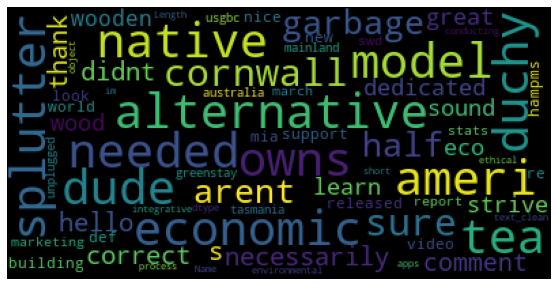

In [269]:
plot_wordcloud(corpus=dtf["text_clean"], max_words=150, max_font_size=35, figsize=(10,5))

In [274]:
def add_word_freq(data, column, lst_words, freq="count"):
    dtf = data.copy()

    ## query
    print("found records:")
    print([word+": "+str(len(dtf[dtf[column].str.contains(word)])) for word in lst_words])
    
    ## vectorizer
    lst_grams = [len(word.split(" ")) for word in lst_words]
    if freq == "tfidf":
        vectorizer = TfidfVectorizer(vocabulary=lst_words, ngram_range=(min(lst_grams),max(lst_grams)))
    else:
        vectorizer = CountVectorizer(vocabulary=lst_words, ngram_range=(min(lst_grams),max(lst_grams)))
    dtf_X = pd.DataFrame(vectorizer.fit_transform(dtf[column]).todense(), columns=lst_words)
    
    ## join
    for word in lst_words:
        dtf[word] = dtf_X[word]
    return dtf

In [278]:
# add specific words as features
dtf = add_word_freq(dtf, "text_clean", lst_words=["new york","new","york"], freq="count")
dtf.head()

found records:
['new york: 79', 'new: 2888', 'york: 83']


id                                         text_clean  new york  new  \
0  ffbxc48  alternative economic model needed native ameri...       0.0  1.0   
1  ffc5i6h  splutter tea dude owns duchy cornwall sure he ...       0.0  0.0   
2  ff8z7yf  garbage half arent necessarily correct didnt s...       0.0  0.0   
3  ff8znss  hello thank comment dedicated learn strive eco...       0.0  0.0   
4  ff8i5we  sound great wood wooden building look nice def...       0.0  0.0   

   york  
0   0.0  
1   0.0  
2   0.0  
3   0.0  
4   0.0

In [280]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,2), lowercase=False)


In [282]:
def fit_bow(corpus, vectorizer=None, vocabulary=None):
    ## vectorizer
    vectorizer = feature_extraction.text.TfidfVectorizer(max_features=None, ngram_range=(1,1), vocabulary=vocabulary) if vectorizer is None else vectorizer
    vectorizer.fit(corpus)
    
    ## sparse matrix
    print("--- creating sparse matrix ---")
    X = vectorizer.transform(corpus)
    print("shape:", X.shape)
    
    ## vocabulary
    print("--- creating vocabulary ---") if vocabulary is None else print("--- used vocabulary ---")
    dic_vocabulary = vectorizer.vocabulary_   #{word:idx for idx, word in enumerate(vectorizer.get_feature_names())}
    print(len(dic_vocabulary), "words")
    
    ## text2tokens
    print("--- tokenization ---")
    tokenizer = vectorizer.build_tokenizer()
    preprocessor = vectorizer.build_preprocessor()
    lst_text2tokens = []
    for text in corpus:
        lst_tokens = [dic_vocabulary[word] for word in tokenizer(preprocessor(text)) if word in dic_vocabulary]
        lst_text2tokens.append(lst_tokens)
    print(len(lst_text2tokens), "texts")
    
    ## plot heatmap
    fig, ax = plt.subplots(figsize=(15,5))
    sns.heatmap(X.todense()[:,np.random.randint(0,X.shape[1],100)]==0, vmin=0, vmax=1, cbar=False, ax=ax).set_title('Sparse Matrix Sample')
    plt.show()
    return {"X":X, "lst_text2tokens":lst_text2tokens, "vectorizer":vectorizer, "dic_vocabulary":dic_vocabulary, "X_names":vectorizer.get_feature_names()}

--- creating sparse matrix ---
shape: (31790, 10000)
--- creating vocabulary ---
10000 words
--- tokenization ---
31790 texts


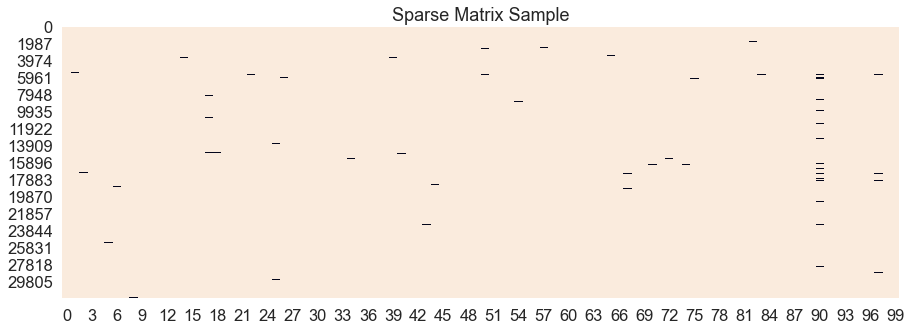

In [284]:
dic_bow = fit_bow(corpus=dtf["text_clean"], vectorizer=vectorizer, vocabulary=None)

X_train, X_names, vectorizer, dic_vocabulary, lst_text2tokens = dic_bow["X"], dic_bow["X_names"], dic_bow["vectorizer"], dic_bow["dic_vocabulary"], dic

In [285]:
# check some features
f_range = (500, 505)

print("fetures name (from dic_vocabulary):")
print({k:v for k,v in sorted(dic_vocabulary.items(), key=lambda item:item[1], reverse=False)
      if v in np.arange(f_range[0], f_range[1]+1, step=1)})

print("")
print("value of these features (in the sparse matrix) for the first text:")
print(vectorizer.get_feature_names()[f_range[0]:f_range[1]])
print(X_train[0, f_range[0]:f_range[1]].todense())

fetures name (from dic_vocabulary):
{'autism': 500, 'auto': 501, 'automaker': 502, 'automate': 503, 'automated': 504, 'automatic': 505}

value of these features (in the sparse matrix) for the first text:
['autism', 'auto', 'automaker', 'automate', 'automated']
[[0. 0. 0. 0. 0.]]


In [286]:
# check text conversion
i = 0

## list of text: ["I like this", ...]
len_txt = len(dtf["text_clean"].iloc[i].split())
print("from: ", dtf["text_clean"].iloc[i], "| len:", len_txt)

## list of token ids: [[1, 2, 3], ...]
len_tokens = len(lst_text2tokens[i])
print("to: ", lst_text2tokens[i], "| len:", len(lst_text2tokens[i]))

## vocabulary: {"I":1, "like":2, "this":3, ...}
print("check: ", dtf["text_clean"].iloc[i].split()[0], " -- idx in vocabulary -->", 
      dic_vocabulary[dtf["text_clean"].iloc[i].split()[0]])

## words not in vocabulary?
if len_txt-len_tokens != 0:
    missing_words = [word for word in dtf["text_clean"].iloc[i].split() if word not in dic_vocabulary.keys()]
    print("!!!", len_txt-len_tokens, "words not in vocabulary:", missing_words)

from:  alternative economic model needed native american aboriginal australian indigenous people provide model thousand year work west colonized land silenced erased way living need new model listen voice prince ancestor conquered killed capitalism indigenous thought | len: 34
to:  aboriginal | len: 10
check:  alternative  -- idx in vocabulary --> 249
!!! 24 words not in vocabulary: ['aboriginal', 'colonized', 'silenced', 'erased', 'prince', 'conquered']


In [293]:
def create_ngrams_detectors(corpus, grams_join=" ", lst_common_terms=[], min_count=5, top=10, figsize=(10,7)):
    ## fit models
    lst_corpus = utils_preprocess_ngrams(corpus, ngrams=1, grams_join=grams_join)
    bigrams_detector = gensim.models.phrases.Phrases(lst_corpus, delimiter=grams_join.encode(), common_terms=lst_common_terms, 
                                                     min_count=min_count, threshold=min_count*2)
    bigrams_detector = gensim.models.phrases.Phraser(bigrams_detector)
    trigrams_detector = gensim.models.phrases.Phrases(bigrams_detector[lst_corpus], delimiter=grams_join.encode(), common_terms=lst_common_terms, 
                                                      min_count=min_count, threshold=min_count*2)
    trigrams_detector = gensim.models.phrases.Phraser(trigrams_detector)

    ## plot
    dtf_ngrams = pd.DataFrame([{"word":grams_join.join([gram.decode() for gram in k]), "freq":v} for k,v in trigrams_detector.phrasegrams.items()])
    dtf_ngrams["ngrams"] = dtf_ngrams["word"].apply(lambda x: x.count(grams_join)+1)
    dtf_ngrams = dtf_ngrams.sort_values(["ngrams","freq"], ascending=[True,False])
    
    fig, ax = plt.subplots(figsize=figsize)
    sns.barplot(x="freq", y="word", hue="ngrams", dodge=False, ax=ax,
                data=dtf_ngrams.groupby('ngrams')["ngrams","freq","word"].head(top))
    ax.set(xlabel=None, ylabel=None, title="Most frequent words")
    ax.grid(axis="x")
    plt.show()
    return [bigrams_detector, trigrams_detector], dtf_ngrams

In [295]:
def utils_preprocess_ngrams(corpus, ngrams=1, grams_join=" ", lst_ngrams_detectors=[]):
    ## create list of n-grams
    lst_corpus = []
    for string in corpus:
        lst_words = string.split()
        lst_grams = [grams_join.join(lst_words[i:i + ngrams]) for i in range(0, len(lst_words), ngrams)]
        lst_corpus.append(lst_grams)
    
    ## detect common bi-grams and tri-grams
    if len(lst_ngrams_detectors) != 0:
        for detector in lst_ngrams_detectors:
            lst_corpus = list(detector[lst_corpus])
    return lst_corpus

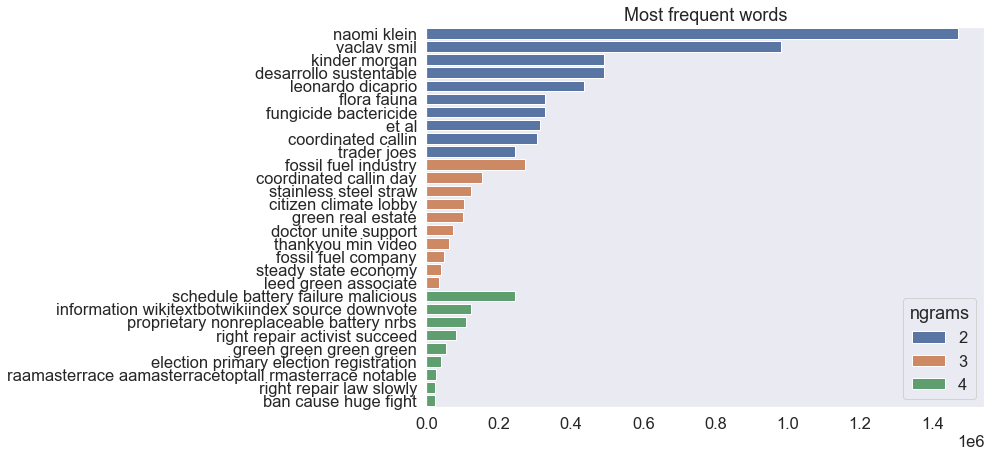

In [296]:
# not necessary, but useful
lst_common_terms = ["of","with","without","and","or","the","a"]

lst_ngrams_detectors, dtf_ngrams = create_ngrams_detectors(corpus=dtf["text_clean"], 
                                                           lst_common_terms=lst_common_terms, min_count=5, 
                                                           top=10, figsize=(10,7))

In [297]:
txt = "donald trump is on saturday night live from new york"
lst_ngrams_detectors[1][txt.split()]

['donald trump',
 'is',
 'on',
 'saturday',
 'night',
 'live',
 'from',
 'new',
 'york']

In [298]:
dtf_ngrams.sample(5)

word        freq  ngrams
1408                 guess ill   18.631238       2
3051  stop burning fossil fuel  240.647136       4
3032              mother earth  118.695631       2
810                 meat dairy  325.909668       2
2508              battery pack   46.914712       2

In [301]:
from tensorflow.keras import callbacks, models, layers, preprocessing as kprocessing
from tensorflow.keras import backend as K

In [299]:
def text2seq(corpus, ngrams=1, grams_join=" ", lst_ngrams_detectors=[], fitted_tokenizer=None, top=None, oov=None, maxlen=None):    
    print("--- tokenization ---")
    
    ## detect common n-grams in corpus
    lst_corpus = utils_preprocess_ngrams(corpus, ngrams=ngrams, grams_join=grams_join, lst_ngrams_detectors=lst_ngrams_detectors)

    ## bow with keras to get text2tokens without creating the sparse matrix
    ### train
    if fitted_tokenizer is None:
        tokenizer = kprocessing.text.Tokenizer(num_words=top, lower=False, split=' ', char_level=False, oov_token=oov,
                                               filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
        tokenizer.fit_on_texts(lst_corpus)
        dic_vocabulary = tokenizer.word_index if top is None else dict(list(tokenizer.word_index.items())[0:top+1])
        print(len(dic_vocabulary), "words")
    else:
        tokenizer = fitted_tokenizer
    ### transform
    lst_text2seq = tokenizer.texts_to_sequences(lst_corpus)

    ## padding sequence (from [1,2],[3,4,5,6] to [0,0,1,2],[3,4,5,6])
    print("--- padding to sequence ---")
    X = kprocessing.sequence.pad_sequences(lst_text2seq, maxlen=maxlen, padding="post", truncating="post")
    print(X.shape[0], "sequences of length", X.shape[1]) 

    ## plot heatmap
    fig, ax = plt.subplots(figsize=(15,5))
    sns.heatmap(X==0, vmin=0, vmax=1, cbar=False, ax=ax).set_title('Sequences Overview')
    plt.show()
    return {"X":X, "tokenizer":tokenizer, "dic_vocabulary":dic_vocabulary} if fitted_tokenizer is None else X

--- tokenization ---
38836 words
--- padding to sequence ---
31790 sequences of length 15


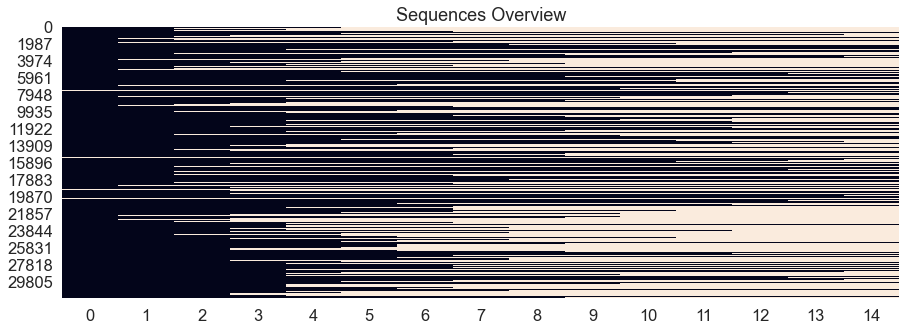

In [302]:
# create input for lstm (sequences of tokens)
dic_seq = text2seq(corpus=dtf["text_clean"], lst_ngrams_detectors=lst_ngrams_detectors, 
                   top=None, oov="NaN", maxlen=15)

X_train, tokenizer, dic_vocabulary = dic_seq["X"], dic_seq["tokenizer"], dic_seq["dic_vocabulary"]

In [304]:
# check text conversion
i = 0

## list of text: ["I like this", ...]
len_txt = len(dtf["text_clean"].iloc[i].split())
print("from: ", dtf["text_clean"].iloc[i], "| len:", len_txt)

## sequence of token ids: [[1, 2, 3], ...]
len_tokens = len(X_train[i])
print("to: ", X_train[i], "| len:", len(X_train[i]))

## vocabulary: {"I":1, "like":2, "this":3, ...}
print("check: ", dtf["text_clean"].iloc[i].split()[0], " -- idx in vocabulary -->", 
      dic_vocabulary[dtf["text_clean"].iloc[i].split()[0]])

print("vocabulary: ", dict(list(dic_vocabulary.items())[0:5]), "... (padding element, 0)")

from:  alternative economic model needed native american aboriginal australian indigenous people provide model thousand year work west colonized land silenced erased way living need new model listen voice prince ancestor conquered killed capitalism indigenous thought | len: 34
to:  [  148  4354   318  5980 14144  1483  4048   302   408  5164    15  1521
 21067   116 11524] | len: 15
check:  alternative  -- idx in vocabulary --> 148
vocabulary:  {'NaN': 1, 'people': 2, 'like': 3, 'need': 4, 'use': 5} ... (padding element, 0)


In [308]:
def fit_w2v(corpus, ngrams=1, grams_join=" ", lst_ngrams_detectors=[], min_count=1, size=300, window=20, sg=1, epochs=100):
    lst_corpus = utils_preprocess_ngrams(corpus, ngrams=ngrams, grams_join=grams_join, lst_ngrams_detectors=lst_ngrams_detectors)
    nlp = gensim.models.word2vec.Word2Vec(lst_corpus, size=size, window=window, min_count=min_count, sg=sg, iter=epochs)
    return lst_corpus, nlp.wv

In [309]:
avg_len = np.max([len(text.split()) for text in dtf["text_clean"]]) /2 

lst_corpus, nlp = fit_w2v(corpus=dtf["text_clean"], lst_ngrams_detectors=lst_ngrams_detectors,
                          min_count=1, size=300, window=avg_len, sg=0, epochs=30)

In [311]:
# check nlp model
word = "fossil fuel"
nlp[word].shape

(300,)

In [313]:
def plot_w2v(lst_words=None, nlp=None, plot_type="2d", top=20, annotate=True, figsize=(10,5)):
    nlp = gensim_api.load("glove-wiki-gigaword-300") if nlp is None else nlp
    fig = plt.figure(figsize=figsize)
    if lst_words is not None:
        fig.suptitle("Word: "+lst_words[0], fontsize=12) if len(lst_words) == 1 else fig.suptitle("Words: "+str(lst_words[:5]), fontsize=12)
    else:
        fig.suptitle("Vocabulary")
    try:
        ## word embedding
        tot_words = lst_words + [tupla[0] for tupla in nlp.most_similar(lst_words, topn=top)] if lst_words is not None else list(nlp.vocab.keys())
        X = nlp[tot_words]
        
        ## pca
        pca = manifold.TSNE(perplexity=40, n_components=int(plot_type[0]), init='pca')
        X = pca.fit_transform(X)

        ## create dtf
        columns = ["x","y"] if plot_type == "2d" else ["x","y","z"]
        dtf = pd.DataFrame(X, index=tot_words, columns=columns)
        dtf["input"] = 0
        if lst_words is not None:
            dtf["input"].iloc[0:len(lst_words)] = 1  #<--this makes the difference between vocabulary and input words
        
        ## plot 2d
        if plot_type == "2d": 
            ax = fig.add_subplot()
            sns.scatterplot(data=dtf, x="x", y="y", hue="input", legend=False, ax=ax, palette={0:'black',1:'red'})
            ax.set(xlabel=None, ylabel=None, xticks=[], xticklabels=[], yticks=[], yticklabels=[])
            if annotate is True:
                for i in range(len(dtf)):
                    ax.annotate(dtf.index[i], xy=(dtf["x"].iloc[i],dtf["y"].iloc[i]), 
                                xytext=(5,2), textcoords='offset points', ha='right', va='bottom')
        
        ## plot 3d
        elif plot_type == "3d":
            from mpl_toolkits.mplot3d import Axes3D
            ax = fig.add_subplot(111, projection='3d')
            ax.scatter(dtf[dtf["input"]==0]['x'], dtf[dtf["input"]==0]['y'], dtf[dtf["input"]==0]['z'], c="black")
            ax.scatter(dtf[dtf["input"]==1]['x'], dtf[dtf["input"]==1]['y'], dtf[dtf["input"]==1]['z'], c="red")
            ax.set(xlabel=None, ylabel=None, zlabel=None, xticklabels=[], yticklabels=[], zticklabels=[])
            if annotate is True:
                for label, row in dtf[["x","y","z"]].iterrows():
                    x, y, z = row
                    ax.text(x, y, z, s=label)
            
        plt.show()
        
    except Exception as e:
        print("--- got error ---")
        print(e)
        word = str(e).split("'")[1]
        print("maybe you are looking for ... ")
        print([k for k in list(nlp.vocab.keys()) if 1-nltk.jaccard_distance(set(word),set(k)) > 0.7])

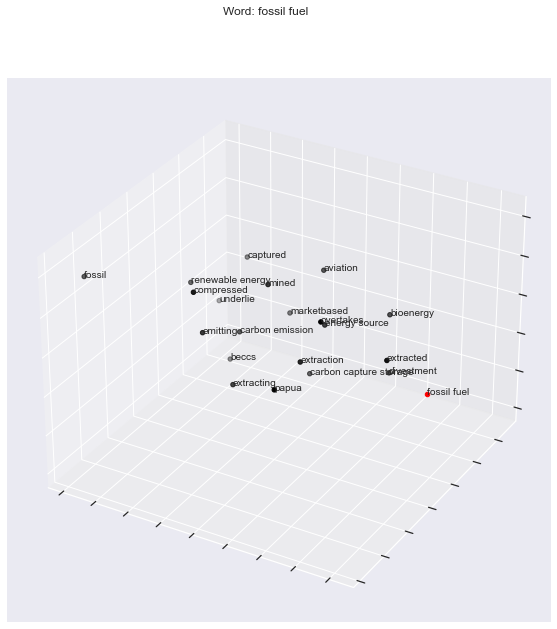

In [315]:
#%matplotlib notebook
plot_w2v(lst_words=[word], nlp=nlp, plot_type="3d", top=20, figsize=(15,10))

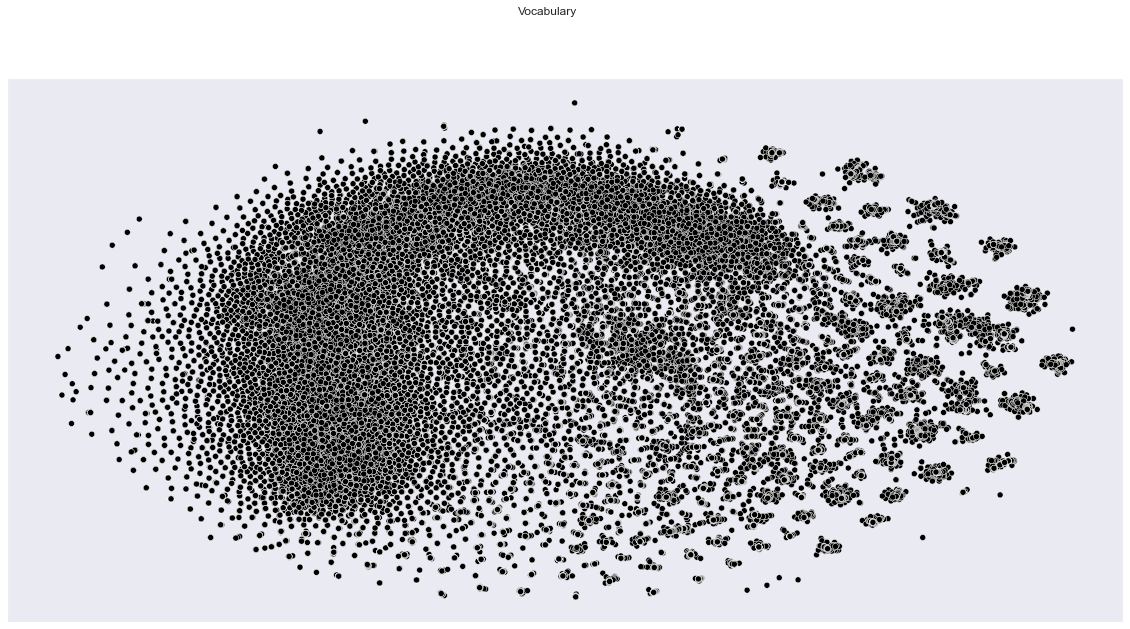

In [316]:
plot_w2v(lst_words=None, nlp=nlp, plot_type="2d", annotate=False, figsize=(20,10))

In [317]:
def vocabulary_embeddings(dic_vocabulary, nlp=None):
    nlp = gensim_api.load("glove-wiki-gigaword-300") if nlp is None else nlp
    embeddings = np.zeros((len(dic_vocabulary)+1, nlp.vector_size))
    for word,idx in dic_vocabulary.items():
        ## update the row with vector
        try:
            embeddings[idx] =  nlp[word]
        ## if word not in model then skip and the row stays all zeros
        except:
            pass
    print("vocabulary mapped to", embeddings.shape[0], "vectors of size", embeddings.shape[1])
    return embeddings

In [318]:
embeddings = vocabulary_embeddings(dic_vocabulary, nlp)


vocabulary mapped to 38837 vectors of size 300


In [320]:
# check
word = dtf["text_clean"].iloc[0].split()[0]
print("word:", word)
print("dic[word]:", dic_vocabulary[word], "|idx")
print("embeddings[idx]:", embeddings[dic_vocabulary[word]].shape, "|vector")

word: alternative
dic[word]: 148 |idx
embeddings[idx]: (300,) |vector


In [321]:
# padding element
print("null vector:", 0)
embeddings[0]

null vector: 0


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [322]:
def attention_layer(x, neurons):
    Q, K, V = x, x, x
    K = layers.Permute((2,1))(K)
    QxK = layers.Dense(neurons, activation="softmax")(K)
    QxK = layers.Permute((2,1), name="attention")(QxK)
    x = layers.multiply([V, QxK])
    return x

In [324]:
# Embedding network with Bi-LSTM and Attention layers (for attention explainer)

x_in = layers.Input(shape=(X_train.shape[1],))

## embedding
x = layers.Embedding(input_dim=embeddings.shape[0], output_dim=embeddings.shape[1], weights=[embeddings],
                     input_length=X_train.shape[1], trainable=False)(x_in)

## attention
#x = attention_layer(x, neurons=X_train.shape[1])  #<-- tensorflow 1 (manual function)
x = layers.Attention()([x,x])                      #<-- tensorflow 2 (included in keras)

## 2 layers of bidirectional lstm
x = layers.Bidirectional(layers.LSTM(units=X_train.shape[1], dropout=0.2, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(units=X_train.shape[1], dropout=0.2))(x)

## final dense layers
x = layers.Dense(64, activation='relu')(x)
#y_out = layers.Dense(units=len(np.unique(y_train)), activation='softmax')(x)

## compile
model = models.Model(x_in, y_out)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

NameError: name 'y_out' is not defined

In [326]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification

In [327]:
tokenizer = transformers.AutoTokenizer.from_pretrained('distilbert-base-uncased', do_lower_case=True)
nlp = transformers.TFDistilBertModel.from_pretrained('distilbert-base-uncased')
lst_vocabulary = list(tokenizer.vocab.keys())

ImportError: 
TFDistilBertModel requires the TensorFlow library but it was not found in your environment. Checkout the instructions on the
installation page: https://www.tensorflow.org/install and follow the ones that match your environment.


In [329]:
def fit_lda(corpus, ngrams=1, grams_join=" ", lst_ngrams_detectors=[], n_topics=3, figsize=(10,7)):
    ## train the lda
    lst_corpus = utils_preprocess_ngrams(corpus, ngrams=ngrams, grams_join=grams_join, lst_ngrams_detectors=lst_ngrams_detectors)
    id2word = gensim.corpora.Dictionary(lst_corpus) #map words with an id
    dic_corpus = [id2word.doc2bow(word) for word in lst_corpus]  #create dictionary Word:Freq
    print("--- training ---")
    lda_model = gensim.models.ldamodel.LdaModel(corpus=dic_corpus, id2word=id2word, num_topics=n_topics, 
                                                random_state=123, update_every=1, chunksize=100, 
                                                passes=10, alpha='auto', per_word_topics=True)
    
    ## output
    lst_dics = []
    for i in range(0, n_topics):
        lst_tuples = lda_model.get_topic_terms(i)
        for tupla in lst_tuples:
            lst_dics.append({"topic":i, "id":tupla[0], "word":id2word[tupla[0]], "weight":tupla[1]})
    dtf_topics = pd.DataFrame(lst_dics, columns=['topic','id','word','weight'])
    
    ## plot
    fig, ax = plt.subplots(figsize=figsize)
    sns.barplot(y="word", x="weight", hue="topic", data=dtf_topics, dodge=False, ax=ax).set_title('Main Topics')
    ax.set(ylabel="", xlabel="importance")
    plt.show()
    return lda_model, dtf_topics

--- training ---


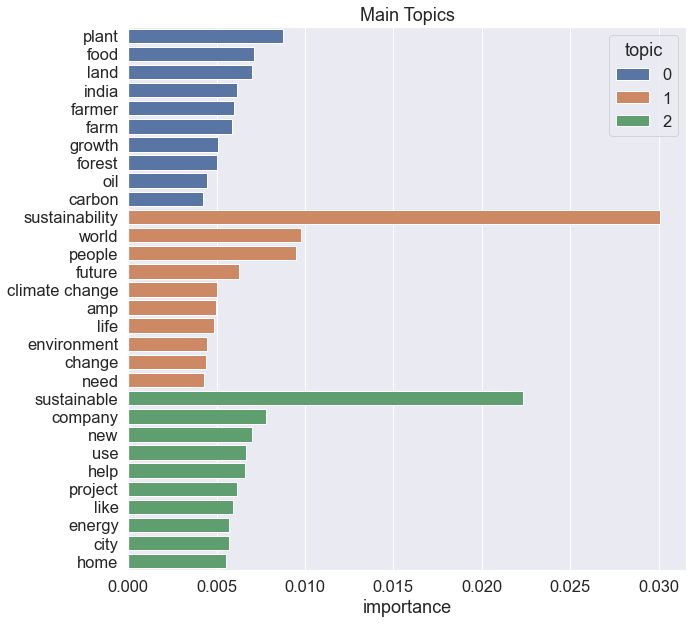

In [332]:
dtf_topics = pd.DataFrame()

lda, dtf_y = fit_lda(corpus=dtf["text_clean"], n_topics=3, 
                         lst_ngrams_detectors=lst_ngrams_detectors, figsize=(10,10))

dtf_topics = dtf_topics.append(dtf_y)
print(" ")

In [335]:
dtf_topics

topic     id            word    weight
0       0   1546           plant  0.008778
1       0    722            food  0.007109
2       0     12            land  0.007018
3       0   2642           india  0.006156
4       0   3120          farmer  0.005958
5       0    721            farm  0.005889
6       0   4625          growth  0.005091
7       0   2639          forest  0.005005
8       0   1449             oil  0.004462
9       0    217          carbon  0.004246
10      1   4238  sustainability  0.030064
11      1    233           world  0.009791
12      1     77          people  0.009515
13      1    498          future  0.006275
14      1    227  climate change  0.005003
15      1  19823             amp  0.004949
16      1   1148            life  0.004852
17      1    258     environment  0.004484
18      1    202          change  0.004416
19      1     17            need  0.004281
20      2    333     sustainable  0.022346
21      2    203         company  0.007779
22      2     19             new  0.007031
23      2    186             use  0.006645
24      2    310            help  0.006601
25      2    323         project  0.006146
26      2    162            like  0.005953
27      2    473          energy  0.005723
28      2   1885            city  0.005711
29      2    264            home  0.005543

In [337]:
dic_clusters = {y:dtf_topics["word"].values.tolist()}

for k,v in dic_clusters.items():
    print(k, ": ", v[0:5], "...", len(v))

worldwide goal let people :  ['plant', 'food', 'land', 'india', 'farmer'] ... 30


In [340]:
def plot_w2v_cluster(dic_words=None, nlp=None, plot_type="2d", annotate=True, figsize=(10,5)):
    nlp = gensim_api.load("glove-wiki-gigaword-300") if nlp is None else nlp
    fig = plt.figure(figsize=figsize)
    fig.suptitle("Word Clusters", fontsize=12)
    try:
        ## word embedding
        tot_words = [word for v in dic_words.values() for word in v]
        X = nlp[tot_words]
        
        ## pca
        pca = manifold.TSNE(perplexity=40, n_components=int(plot_type[0]), init='pca')
        X = pca.fit_transform(X)

        ## create dtf
        columns = ["x","y"] if plot_type == "2d" else ["x","y","z"]
        dtf = pd.DataFrame()
        for k,v in dic_words.items():
            size = len(dtf) + len(v)
            dtf_group = pd.DataFrame(X[len(dtf):size], columns=columns, index=v)
            dtf_group["cluster"] = k
            dtf = dtf.append(dtf_group)
        
        ## plot 2d
        if plot_type == "2d": 
            ax = fig.add_subplot()
            sns.scatterplot(data=dtf, x="x", y="y", hue="cluster", ax=ax)
            ax.legend().texts[0].set_text(None)
            ax.set(xlabel=None, ylabel=None, xticks=[], xticklabels=[], yticks=[], yticklabels=[])
            if annotate is True:
                for i in range(len(dtf)):
                    ax.annotate(dtf.index[i], xy=(dtf["x"].iloc[i],dtf["y"].iloc[i]), 
                                xytext=(5,2), textcoords='offset points', ha='right', va='bottom')
        
        ## plot 3d
        elif plot_type == "3d":
            from mpl_toolkits.mplot3d import Axes3D
            ax = fig.add_subplot(111, projection='3d')
            colors = sns.color_palette(None, len(dic_words.keys()))
            for n,k in enumerate(dic_words.keys()):
                ax.scatter(dtf[dtf["cluster"]==k]['x'], dtf[dtf["cluster"]==k]['y'], dtf[dtf["cluster"]==k]['z'], c=colors[n], label=k)
            ax.set(xlabel=None, ylabel=None, zlabel=None, xticklabels=[], yticklabels=[], zticklabels=[])
            ax.legend()
            if annotate is True:
                for label, row in dtf[["x","y","z"]].iterrows():
                    x, y, z = row
                    ax.text(x, y, z, s=label)
        
        plt.show()
    
    except Exception as e:
        print("--- got error ---")
        print(e)
        word = str(e).split("'")[1]
        print("maybe you are looking for ... ")
        print([k for k in list(nlp.vocab.keys()) if 1-nltk.jaccard_distance(set(word),set(k)) > 0.7])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


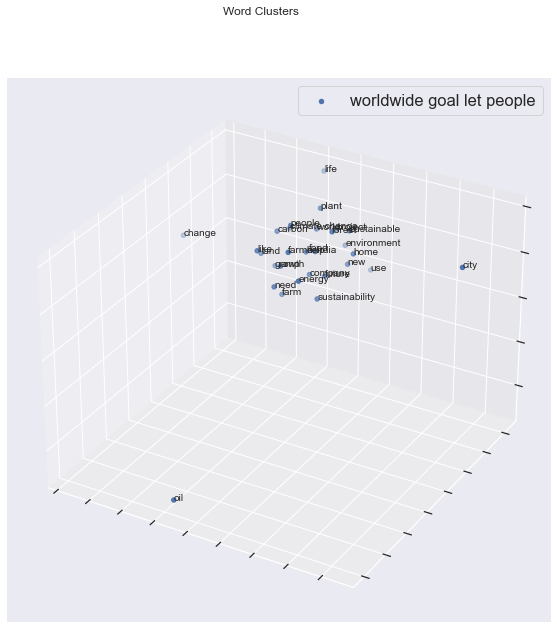

In [341]:
#%matplotlib notebook
plot_w2v_cluster(dic_clusters, nlp, plot_type="3d", annotate=True, figsize=(20,10))

In [350]:
def embedding_bert(x, tokenizer=None, nlp=None, log=False):
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased') if tokenizer is None else tokenizer
    nlp =TFBertModel.from_pretrained('bert-base-uncased') if nlp is None else nlp
    
    ## single word --> vec (size,)
    if (type(x) is str) and (len(x.split()) == 1):
        X = utils_bert_embedding(x, tokenizer, nlp, log).reshape(-1)
    
    ## list of words --> matrix (n, size)
    elif (type(x) is list) and (type(x[0]) is str) and (len(x[0].split()) == 1):
        X = utils_bert_embedding(x, tokenizer, nlp, log)
    
    ## list of lists of words --> matrix (n mean vectors, size)
    elif (type(x) is list) and (type(x[0]) is list):
        lst_mean_vecs = [utils_bert_embedding(lst, tokenizer, nlp, log).mean(0) for lst in x]
        X = np.array(lst_mean_vecs)
    
    ## single text --> matrix (n words, size)
    elif (type(x) is str) and (len(x.split()) > 1):
        X = utils_bert_embedding(x, tokenizer, nlp, log)
        
    ## list of texts --> matrix (n mean vectors, size)
    else:
        lst_mean_vecs = [utils_bert_embedding(txt, tokenizer, nlp, log).mean(0) for txt in x]
        X = np.array(lst_mean_vecs)
    return X

In [344]:
def explainer_similarity_classif(tokenizer, nlp, dic_clusters, txt_instance, token_level=False, top=5, figsize=(20,10)):
    ## create embedding Matrix
    y = np.concatenate([embedding_bert(v, tokenizer, nlp) for v in dic_clusters.values()])
    X = embedding_bert(txt_instance, tokenizer, nlp) if token_level is True else embedding_bert(txt_instance, tokenizer, nlp).mean(0).reshape(1,-1)
    M = np.concatenate([y,X])
    
    ## pca
    pca = manifold.TSNE(perplexity=40, n_components=2, init='pca')
    M = pca.fit_transform(M)
    y, X = M[:len(y)], M[len(y):]
    
    ## create dtf clusters
    dtf = pd.DataFrame()
    for k,v in dic_clusters.items():
        size = len(dtf) + len(v)
        dtf_group = pd.DataFrame(y[len(dtf):size], columns=["x","y"], index=v)
        dtf_group["cluster"] = k
        dtf = dtf.append(dtf_group)
        
    ## plot clusters
    fig, ax = plt.subplots(figsize=figsize)
    sns.scatterplot(data=dtf, x="x", y="y", hue="cluster", ax=ax)
    ax.legend().texts[0].set_text(None)
    ax.set(xlabel=None, ylabel=None, xticks=[], xticklabels=[], yticks=[], yticklabels=[])
    for i in range(len(dtf)):
        ax.annotate(dtf.index[i], xy=(dtf["x"].iloc[i],dtf["y"].iloc[i]), xytext=(5,2), textcoords='offset points', ha='right', va='bottom')
    
    ## add txt_instance
    if token_level is True:
        tokens = tokenizer.convert_ids_to_tokens(tokenizer.encode(txt_instance))[1:-1]
        dtf = pd.DataFrame(X, columns=["x","y"], index=tokens)
        dtf = dtf[~dtf.index.str.contains("#")]
        dtf = dtf[dtf.index.str.len() > 1]
        X = dtf.values
        ax.scatter(x=dtf["x"], y=dtf["y"], c="red")
        for i in range(len(dtf)):
            ax.annotate(dtf.index[i], xy=(dtf["x"].iloc[i],dtf["y"].iloc[i]), xytext=(5,2), textcoords='offset points', ha='right', va='bottom')
    else:
        ax.scatter(x=X[0][0], y=X[0][1], c="red", linewidth=10)
        ax.annotate("x", xy=(X[0][0],X[0][1]), ha='center', va='center', fontsize=25)
    
    ## calculate similarity
    sim_matrix = utils_cosine_sim(X,y) 

    ## add top similarity
    for row in range(sim_matrix.shape[0]):
        ### sorted {keyword:score}
        dic_sim = {n:sim_matrix[row][n] for n in range(sim_matrix.shape[1])}
        dic_sim = {k:v for k,v in sorted(dic_sim.items(), key=lambda item:item[1], reverse=True)}
        ### plot lines
        for k in dict(list(dic_sim.items())[0:top]).keys():
            p1 = [X[row][0], X[row][1]]
            p2 = [y[k][0], y[k][1]]
            ax.plot([p1[0],p2[0]], [p1[1],p2[1]], c="red", alpha=0.5)
    plt.show()

In [348]:
def utils_bert_embedding(txt, tokenizer, nlp, log=False):
    idx = tokenizer.encode(txt)
    if log is True:
        print("tokens:", tokenizer.convert_ids_to_tokens(idx))
        print("ids   :", tokenizer.encode(txt))
    idx = np.array(idx)[None,:]  
    embedding = nlp(idx)
    X = np.array(embedding[0][0][1:-1])
    return X

In [351]:
explainer_similarity_classif(tokenizer, nlp, dic_clusters, dtf["text_clean"].iloc[i], 
                             token_level=True, top=1, figsize=(20,10))

TypeError: TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]

In [355]:
df = dfx.copy()

In [369]:
df.head()

id                                               body  \
0  ffbxc48  alternative economic model needed native ameri...   
1  ffc5i6h  splutters tea dude owns duchy cornwall sure he...   
2  ff8z7yf  garbage half arent necessarily correct didnt s...   
3  ff8znss  hello thank comment dedicated learn strive eco...   
4  ff8i5we  sounds great wood wooden buildings look nice d...   

                                          text_clean  
0  alternative economic model needed native ameri...  
1  splutter tea dude owns duchy cornwall sure he ...  
2  garbage half arent necessarily correct didnt s...  
3  hello thank comment dedicated learn strive eco...  
4  sound great wood wooden building look nice def...

In [358]:
import spacy
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
#from contractions import CONTRACTION_MAP
import unicodedata

In [363]:
nlp = spacy.load('en_core_web_sm', parse = True, tag=True, entity=True)
#nlp_vec = spacy.load('en_vecs', parse = True, tag=True, entity=True)
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')


In [367]:
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

strip_html_tags('<html><h2>Some important text</h2></html>')

'Some important text'

In [364]:
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

In [365]:
lemmatize_text("My system keeps crashing! his crashed yesterday, ours crashes daily")


'My system keep crash ! his crash yesterday , ours crash daily'

In [366]:
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text
remove_accented_chars('Sómě Áccěntěd těxt')


'Some Accented text'

In [368]:
def normalize_corpus(corpus, html_stripping=True, accented_char_removal=True, 
                     text_lemmatization=True):
    
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)    
        
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus

In [371]:
df['clean_text'] = normalize_corpus(df['text_clean'])
norm_corpus = list(df['clean_text'])
df.iloc[1][['text_clean', 'clean_text']].to_dict()

{'text_clean': 'splutter tea dude owns duchy cornwall sure he somewhat environmentally friendly he personally benefitted hugely business usual',
 'clean_text': 'splutter tea dude own duchy cornwall sure he somewhat environmentally friendly he personally benefit hugely business usual'}

## Tagging Parts of Speech


In [378]:
sentence = str(df.clean_text.iloc[4])
sentence_nlp = nlp(sentence)

In [377]:
df.clean_text.iloc[4]

'sound great wood wooden building look nice definitely increase fire risk hopefully good sprinkler system mitigate article point fire resistance clt wood experiment laminate damage allow wood combust article us example lighting match log show log will not set fire silly point concrete block brick fire resistant test wood combustible get hot fuel fire unlike brick concrete clt good material spread fire quickly start fire go big material'

In [379]:
spacy_pos_tagged = [(word, word.tag_, word.pos_) for word in sentence_nlp]
pd.DataFrame(spacy_pos_tagged, columns=['Word', 'POS tag', 'Tag type'])

Word POS tag Tag type
0      sound      VB     VERB
1      great      JJ      ADJ
2       wood      NN     NOUN
3     wooden      JJ      ADJ
4   building      NN     NOUN
..       ...     ...      ...
63     start     VBP     VERB
64      fire      NN     NOUN
65        go      VB     VERB
66       big      JJ      ADJ
67  material      NN     NOUN

[68 rows x 3 columns]

In [380]:
nltk_pos_tagged = nltk.pos_tag(sentence.split())
pd.DataFrame(nltk_pos_tagged, columns=['Word', 'POS tag'])

Word POS tag
0      sound      JJ
1      great      JJ
2       wood      NN
3     wooden      NN
4   building      NN
..       ...     ...
63     start      VB
64      fire      NN
65        go     VBP
66       big      JJ
67  material      NN

[68 rows x 2 columns]

## Shallow Parsing or Chunking Text


In [381]:
from nltk.corpus import conll2000
data = conll2000.chunked_sents()

In [383]:
len(data)

10948

In [384]:
train_data = data[:10900]
test_data = data[10900:] 

print(len(train_data), len(test_data))
print(train_data[1]) 

10900 48
(S
  Chancellor/NNP
  (PP of/IN)
  (NP the/DT Exchequer/NNP)
  (NP Nigel/NNP Lawson/NNP)
  (NP 's/POS restated/VBN commitment/NN)
  (PP to/TO)
  (NP a/DT firm/NN monetary/JJ policy/NN)
  (VP has/VBZ helped/VBN to/TO prevent/VB)
  (NP a/DT freefall/NN)
  (PP in/IN)
  (NP sterling/NN)
  (PP over/IN)
  (NP the/DT past/JJ week/NN)
  ./.)


In [385]:
from nltk.chunk.util import tree2conlltags, conlltags2tree

wtc = tree2conlltags(train_data[1])
wtc

[('Chancellor', 'NNP', 'O'),
 ('of', 'IN', 'B-PP'),
 ('the', 'DT', 'B-NP'),
 ('Exchequer', 'NNP', 'I-NP'),
 ('Nigel', 'NNP', 'B-NP'),
 ('Lawson', 'NNP', 'I-NP'),
 ("'s", 'POS', 'B-NP'),
 ('restated', 'VBN', 'I-NP'),
 ('commitment', 'NN', 'I-NP'),
 ('to', 'TO', 'B-PP'),
 ('a', 'DT', 'B-NP'),
 ('firm', 'NN', 'I-NP'),
 ('monetary', 'JJ', 'I-NP'),
 ('policy', 'NN', 'I-NP'),
 ('has', 'VBZ', 'B-VP'),
 ('helped', 'VBN', 'I-VP'),
 ('to', 'TO', 'I-VP'),
 ('prevent', 'VB', 'I-VP'),
 ('a', 'DT', 'B-NP'),
 ('freefall', 'NN', 'I-NP'),
 ('in', 'IN', 'B-PP'),
 ('sterling', 'NN', 'B-NP'),
 ('over', 'IN', 'B-PP'),
 ('the', 'DT', 'B-NP'),
 ('past', 'JJ', 'I-NP'),
 ('week', 'NN', 'I-NP'),
 ('.', '.', 'O')]

In [386]:
tree = conlltags2tree(wtc) 
print(tree)

(S
  Chancellor/NNP
  (PP of/IN)
  (NP the/DT Exchequer/NNP)
  (NP Nigel/NNP Lawson/NNP)
  (NP 's/POS restated/VBN commitment/NN)
  (PP to/TO)
  (NP a/DT firm/NN monetary/JJ policy/NN)
  (VP has/VBZ helped/VBN to/TO prevent/VB)
  (NP a/DT freefall/NN)
  (PP in/IN)
  (NP sterling/NN)
  (PP over/IN)
  (NP the/DT past/JJ week/NN)
  ./.)


In [387]:
def conll_tag_chunks(chunk_sents):
    tagged_sents = [tree2conlltags(tree) for tree in chunk_sents]
    return [[(t, c) for (w, t, c) in sent] for sent in tagged_sents]


def combined_tagger(train_data, taggers, backoff=None):
    for tagger in taggers:
        backoff = tagger(train_data, backoff=backoff)
    return backoff 

In [389]:
from nltk.tag import UnigramTagger, BigramTagger
from nltk.chunk import ChunkParserI

class NGramTagChunker(ChunkParserI):
    
  def __init__(self, train_sentences, 
               tagger_classes=[UnigramTagger, BigramTagger]):
    train_sent_tags = conll_tag_chunks(train_sentences)
    self.chunk_tagger = combined_tagger(train_sent_tags, tagger_classes)

  def parse(self, tagged_sentence):
    if not tagged_sentence: 
        return None
    pos_tags = [tag for word, tag in tagged_sentence]
    chunk_pos_tags = self.chunk_tagger.tag(pos_tags)
    chunk_tags = [chunk_tag for (pos_tag, chunk_tag) in chunk_pos_tags]
    wpc_tags = [(word, pos_tag, chunk_tag) for ((word, pos_tag), chunk_tag)
                     in zip(tagged_sentence, chunk_tags)]
    return conlltags2tree(wpc_tags)

In [390]:
ntc = NGramTagChunker(train_data)
print(ntc.evaluate(test_data))

ChunkParse score:
    IOB Accuracy:  90.0%%
    Precision:     82.1%%
    Recall:        86.3%%
    F-Measure:     84.1%%


In [391]:
chunk_tree = ntc.parse(nltk_pos_tagged)
print(chunk_tree)

(S
  (NP
    sound/JJ
    great/JJ
    wood/NN
    wooden/NN
    building/NN
    look/NN
    nice/JJ)
  definitely/RB
  (NP increase/NN fire/NN risk/NN)
  hopefully/RB
  (NP
    good/JJ
    sprinkler/NN
    system/NN
    mitigate/JJ
    article/NN
    point/NN
    fire/NN
    resistance/NN
    clt/NN
    wood/NN
    experiment/NN
    laminate/NN
    damage/NN)
  (VP allow/VB)
  (NP wood/NN combust/NN article/NN)
  (NP us/PRP example/NN)
  (VP lighting/VBG)
  (NP match/NN log/NN)
  (VP show/VBP)
  (NP log/NN)
  (VP will/MD not/RB set/VB)
  (NP
    fire/NN
    silly/JJ
    point/NN
    concrete/NN
    block/NN
    brick/NN
    fire/NN
    resistant/JJ
    test/NN
    wood/NN
    combustible/JJ)
  (VP get/VB)
  (NP hot/JJ fuel/NN fire/NN)
  (PP unlike/IN)
  (NP
    brick/JJ
    concrete/NN
    clt/NN
    good/JJ
    material/NN
    spread/NN
    fire/NN)
  quickly/RB
  (VP start/VB)
  (NP fire/NN)
  (VP go/VBP)
  (NP big/JJ material/NN))


In [394]:
#!pip install svgling

     ---------------------------------------- 67.0/67.0 KB 3.5 MB/s eta 0:00:00


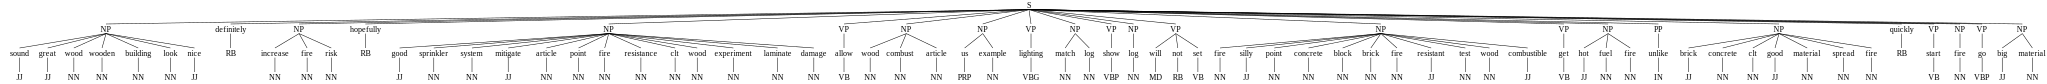

In [395]:
from IPython.display import display
display(chunk_tree)

## Constituency parsing


In [399]:
import os
java_path = "C:/Program Files/Java/jdk1.8.0_321/bin/java.exe"
os.environ['JAVAHOME'] = java_path

In [400]:
from nltk.parse.stanford import StanfordParser

scp = StanfordParser(path_to_jar='stanford-parser.jar',
                   path_to_models_jar='stanford-parser-4.2.0-models.jar')
                   
result = list(scp.raw_parse(sentence))
print(result[0])

(ROOT
  (S
    (VP
      (VB sound)
      (S
        (NP (JJ great) (NN wood) (JJ wooden) (NN building))
        (VP
          (VB look)
          (S (ADJP (JJ nice)))
          (ADVP (RB definitely))
          (S
            (S
              (S
                (FRAG
                  (NP
                    (NN increase)
                    (NN fire)
                    (NN risk)
                    (NN hopefully)
                    (NN good)
                    (NN sprinkler)
                    (NN system)
                    (NN mitigate)
                    (NN article)
                    (NN point)
                    (NN fire)
                    (NN resistance)
                    (NN clt)
                    (NN wood)
                    (NN experiment)
                    (NN laminate)
                    (NN damage)))
                (VP
                  (VB allow)
                  (NP (NML (NN wood) (NN combust)) (NN article))))
              (NP
                (NP (PR

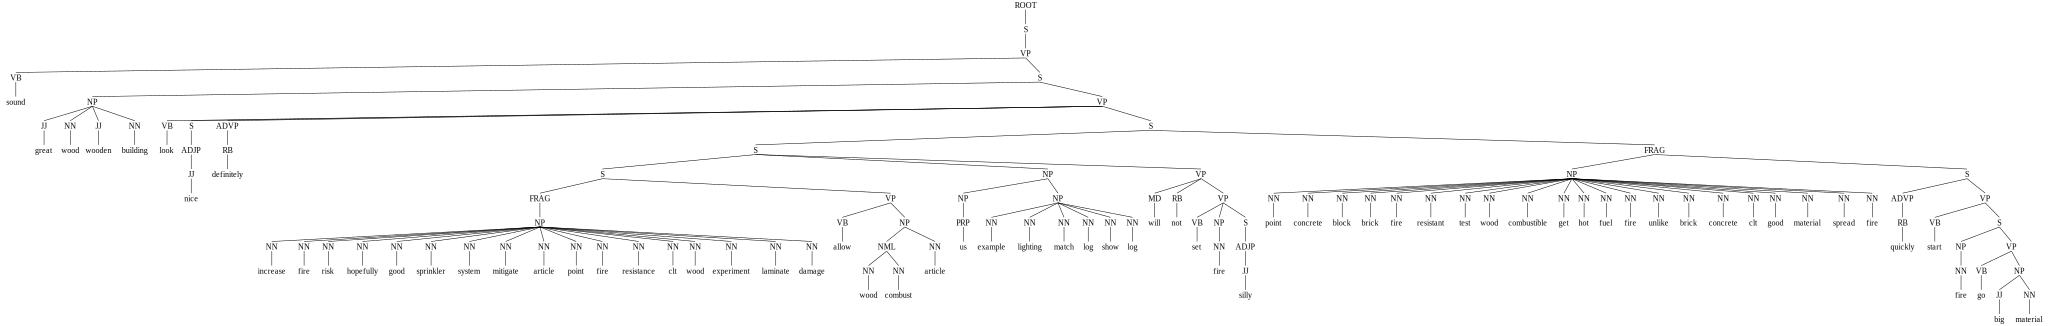

In [401]:
from IPython.display import display
display(result[0])

In [402]:
dependency_pattern = '{left}<---{word}[{w_type}]--->{right}\n--------'
for token in sentence_nlp:
    print(dependency_pattern.format(word=token.orth_, 
                                  w_type=token.dep_,
                                  left=[t.orth_ 
                                            for t 
                                            in token.lefts],
                                  right=[t.orth_ 
                                             for t 
                                             in token.rights]))

[]<---sound[amod]--->[]
--------
[]<---great[amod]--->[]
--------
[]<---wood[nmod]--->[]
--------
[]<---wooden[amod]--->[]
--------
['sound', 'great', 'wood', 'wooden']<---building[nsubj]--->[]
--------
['building']<---look[ROOT]--->['nice', 'increase', 'allow']
--------
[]<---nice[acomp]--->[]
--------
[]<---definitely[advmod]--->[]
--------
['definitely']<---increase[advcl]--->['risk', 'hopefully', 'point']
--------
[]<---fire[compound]--->[]
--------
['fire']<---risk[dobj]--->[]
--------
[]<---hopefully[advmod]--->[]
--------
[]<---good[amod]--->[]
--------
[]<---sprinkler[compound]--->[]
--------
['sprinkler']<---system[compound]--->[]
--------
['good', 'system']<---mitigate[compound]--->[]
--------
[]<---article[compound]--->[]
--------
['mitigate', 'article']<---point[npadvmod]--->[]
--------
[]<---fire[compound]--->[]
--------
['fire']<---resistance[compound]--->[]
--------
[]<---clt[compound]--->[]
--------
[]<---wood[compound]--->[]
--------
['clt', 'wood']<---experiment[compo

In [403]:
sentence_nlp

sound great wood wooden building look nice definitely increase fire risk hopefully good sprinkler system mitigate article point fire resistance clt wood experiment laminate damage allow wood combust article us example lighting match log show log will not set fire silly point concrete block brick fire resistant test wood combustible get hot fuel fire unlike brick concrete clt good material spread fire quickly start fire go big material

In [404]:
from spacy import displacy

displacy.render(sentence_nlp, jupyter=True, 
                options={'distance': 110,
                         'arrow_stroke': 2,
                         'arrow_width': 8})

In [405]:
from nltk.parse.stanford import StanfordDependencyParser
sdp = StanfordDependencyParser(path_to_jar='stanford-parser.jar',
                               path_to_models_jar='stanford-parser-4.2.0-models.jar')    
result = list(sdp.raw_parse(sentence))  
dep_tree = [parse.tree() for parse in result][0]
print(dep_tree)

(sound
  (look
    (building great wood wooden)
    nice
    definitely
    (set
      (allow
        (damage
          increase
          fire
          risk
          hopefully
          good
          sprinkler
          system
          mitigate
          article
          point
          fire
          resistance
          clt
          wood
          experiment
          laminate)
        (article (combust wood)))
      (us (log example lighting match log show))
      will
      not
      fire
      silly
      (fire
        point
        concrete
        block
        brick
        fire
        resistant
        test
        wood
        combustible
        get
        hot
        fuel
        fire
        unlike
        brick
        concrete
        clt
        good
        material
        spread
        (start quickly (go fire (material big)))))))


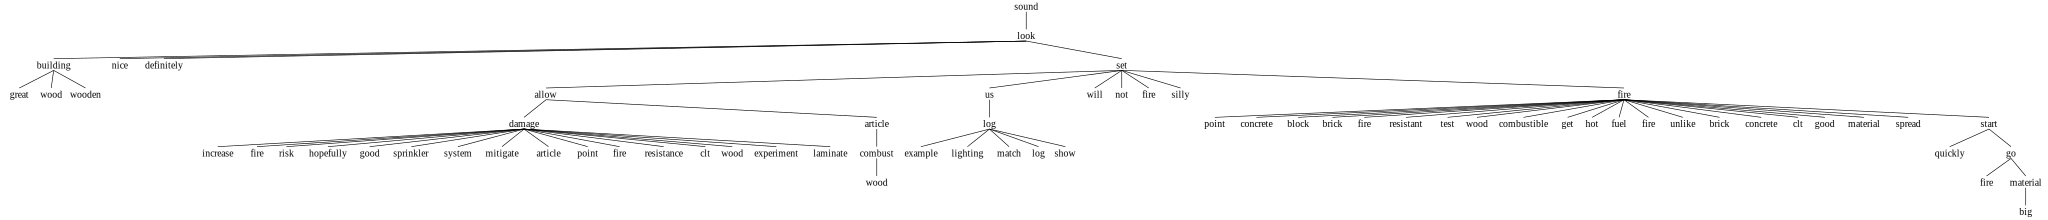

In [406]:
from IPython.display import display
display(dep_tree)

## Named Entity Recognition


In [412]:
# sentence = str(news_df.iloc[1].full_text)
# sentence_nlp = nlp(sentence)
sentence_nlp = nlp("US unveils world's most powerful supercomputer, beats China. The US has unveiled the world's most powerful supercomputer called 'Summit', beating the previous record-holder China's Sunway TaihuLight. With a peak performance of 200,000 trillion calculations per second, it is over twice as fast as Sunway TaihuLight, which is capable of 93,000 trillion calculations per second. Summit has 4,608 servers, which reportedly take up the size of two tennis courts.")

In [413]:
print([(word, word.ent_type_) for word in sentence_nlp if word.ent_type_])


[(US, 'GPE'), (China, 'GPE'), (US, 'GPE'), (China, 'GPE'), (Sunway, 'ORG'), (TaihuLight, 'ORG'), (200,000, 'QUANTITY'), (trillion, 'QUANTITY'), (second, 'ORDINAL'), (Sunway, 'PERSON'), (TaihuLight, 'PERSON'), (93,000, 'QUANTITY'), (trillion, 'QUANTITY'), (4,608, 'CARDINAL'), (two, 'CARDINAL')]


In [414]:
displacy.render(sentence_nlp, style='ent', jupyter=True)


In [416]:
df.head()

id                                               body  \
0  ffbxc48  alternative economic model needed native ameri...   
1  ffc5i6h  splutters tea dude owns duchy cornwall sure he...   
2  ff8z7yf  garbage half arent necessarily correct didnt s...   
3  ff8znss  hello thank comment dedicated learn strive eco...   
4  ff8i5we  sounds great wood wooden buildings look nice d...   

                                          text_clean  \
0  alternative economic model needed native ameri...   
1  splutter tea dude owns duchy cornwall sure he ...   
2  garbage half arent necessarily correct didnt s...   
3  hello thank comment dedicated learn strive eco...   
4  sound great wood wooden building look nice def...   

                                          clean_text  
0  alternative economic model need native america...  
1  splutter tea dude own duchy cornwall sure he s...  
2  garbage half be not necessarily correct do not...  
3  hello thank comment dedicate learn strive ecof...  
4  sound great wood wooden building look nice def...

In [417]:
named_entities = []
for sentence in df["clean_text"]:
    temp_entity_name = ''
    temp_named_entity = None
    sentence = nlp(sentence)
    for word in sentence:
        term = word.text 
        tag = word.ent_type_
        if tag:
            temp_entity_name = ' '.join([temp_entity_name, term]).strip()
            temp_named_entity = (temp_entity_name, tag)
        else:
            if temp_named_entity:
                named_entities.append(temp_named_entity)
                temp_entity_name = ''
                temp_named_entity = None

entity_frame = pd.DataFrame(named_entities, 
                            columns=['Entity Name', 'Entity Type'])

In [421]:
len(entity_frame)

24108

In [422]:
len(df["clean_text"])

31790

In [420]:
top_entities = (entity_frame.groupby(by=['Entity Name', 'Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.T.iloc[:,:15]

0         1         2        3         4      5      6   \
Entity Name  year      zero  american   second       one  today  china   
Entity Type  DATE  CARDINAL      NORP  ORDINAL  CARDINAL   DATE    GPE   
Frequency     573       340       276      268       263    258    248   

                   7    8      9         10          11   12        13  \
Entity Name   million   uk  india      half  california  gmo   billion   
Entity Type  CARDINAL  GPE    GPE  CARDINAL         GPE  ORG  CARDINAL   
Frequency         234  199    179       175         160  154       148   

                  14  
Entity Name  america  
Entity Type      GPE  
Frequency        134

In [423]:
top_entities = (entity_frame.groupby(by=['Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.T.iloc[:,:15]

0       1     2     3     4         5    6        7     8   \
Entity Type   ORG  PERSON   GPE  DATE  NORP  CARDINAL  LOC  ORDINAL  TIME   
Frequency    6578    4851  3711  3363  1826      1524  790      331   263   

              9        10     11        12     13        14  
Entity Type  FAC  PRODUCT  EVENT  QUANTITY  MONEY  LANGUAGE  
Frequency    198      188    150       134    105        41

In [424]:
top_entities

Entity Type  Frequency
0           ORG       6578
1        PERSON       4851
2           GPE       3711
3          DATE       3363
4          NORP       1826
5      CARDINAL       1524
6           LOC        790
7       ORDINAL        331
8          TIME        263
9           FAC        198
10      PRODUCT        188
11        EVENT        150
12     QUANTITY        134
13        MONEY        105
14     LANGUAGE         41
15          LAW         29
16  WORK_OF_ART         14
17      PERCENT         12